In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier # Add DecisionTreeRegressor to this line
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_directory = '/content/drive/MyDrive/Assignments/Data analytics project/'

In [ ]:
# Step 1: Load the datasets
agro_emission_path = my_directory + 'Agrofood_co2_emission.csv'
agro_emission = pd.read_csv(agro_emission_path)

# Display the first few rows to understand the structure
print("Dataset Head:\n", agro_emission.head())
print("\nDataset Info:\n")
agro_emission.info()

Dataset Head:
           Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.

In [ ]:
land_area_path = my_directory +'Transformed_Sorted_Agricultural_Land_Area.csv'
land_area = pd.read_csv(land_area_path)

# Display the first few rows to understand the structure
print("Dataset Head:\n", land_area.head())
print("\nDataset Info:\n")
land_area.info()

Dataset Head:
   Country Name Country Code              Indicator Name  Year  \
0  Afghanistan          AFG  Agricultural land (sq. km)  1990   
1  Afghanistan          AFG  Agricultural land (sq. km)  1991   
2  Afghanistan          AFG  Agricultural land (sq. km)  1992   
3  Afghanistan          AFG  Agricultural land (sq. km)  1993   
4  Afghanistan          AFG  Agricultural land (sq. km)  1994   

   Agricultural land (sq. km)  
0                    380400.0  
1                    380300.0  
2                    380300.0  
3                    379340.0  
4                    378130.0  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9044 entries, 0 to 9043
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                9044 non-null   object 
 1   Country Code                9044 non-null   object 
 2   Indicator Name              9044 non-null   obj

In [ ]:
# Step 2: Merge the datasets
merged_data = pd.merge(
    agro_emission,
    land_area[['Country Name', 'Agricultural land (sq. km)']],
    left_on='Area',
    right_on='Country Name',
    how='left'
)

# Drop the redundant 'Country Name' column
merged_data.drop(columns=['Country Name'], inplace=True)

merged_data.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1990        14.7237        0.0557       205.6077   
2  Afghanistan  1990        14.7237        0.0557       205.6077   
3  Afghanistan  1990        14.7237        0.0557       205.6077   
4  Afghanistan  1990        14.7237        0.0557       205.6077   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0                          0.0                 11.807483   
1             686.0                          0.0                 11.807483   
2             686.0                          0.0                 11.807483   
3             686.0                          0.0                 11.807483   
4             686.0                          0.0                 11.807483   

   Food Transport  Forestland  ...  Fires in organic soils  \
0         63.1152   -2388.803  ...                     0.0   
1         63.1152   -2388.803  ...                     0.0   
2         63.1152   -2388.803  ...                     0.0   
3         63.1152   -2388.803  ...                     0.0   
4         63.1152   -2388.803  ...                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN         9655167.0   
2                              0.0                 NaN         9655167.0   
3                              0.0                 NaN         9655167.0   
4                              0.0                 NaN         9655167.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2593947.0                5348387.0                  5346409.0   
2         2593947.0                5348387.0                  5346409.0   
3         2593947.0                5348387.0                  5346409.0   
4         2593947.0                5348387.0                  5346409.0   

   total_emission  Average Temperature °C  Agricultural land (sq. km)  
0     2198.963539                0.536167                    380400.0  
1     2198.963539                0.536167                    380300.0  
2     2198.963539                0.536167                    380300.0  
3     2198.963539                0.536167                    379340.0  
4     2198.963539                0.536167                    378130.0  

[5 rows x 32 columns]

In [ ]:
# Step 3: Data Cleaning
# Handle missing values in numerical columns
numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    merged_data[col] = merged_data[col].interpolate(method='linear', limit_direction='both')

# Verify the cleaning steps
print("Cleaned Dataset Info:")
merged_data.info()

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191534 entries, 0 to 191533
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Area                             191534 non-null  object 
 1   Year                             191534 non-null  int64  
 2   Savanna fires                    191534 non-null  float64
 3   Forest fires                     191534 non-null  float64
 4   Crop Residues                    191534 non-null  float64
 5   Rice Cultivation                 191534 non-null  float64
 6   Drained organic soils (CO2)      191534 non-null  float64
 7   Pesticides Manufacturing         191534 non-null  float64
 8   Food Transport                   191534 non-null  float64
 9   Forestland                       191534 non-null  float64
 10  Net Forest conversion            191534 non-null  float64
 11  Food Household Consumption       191534 non

In [ ]:

# Step 3: Filter for top 8 agricultural producing countries
top_countries = ['China', 'United States', 'Brazil', 'India', 'Russia', 'France', 'Mexico', 'Japan']
top_countries_data = merged_data[merged_data['Area'].isin(top_countries)]

# Emissions Intensity
top_countries_data['Emissions_Intensity'] = (
    top_countries_data['total_emission'] /
    (top_countries_data['Rural population'] + top_countries_data['Urban population'] + 1e-6)
)

# Define agricultural emissions as a subset of total emissions
agricultural_emissions_features = [
    'Crop Residues', 'Rice Cultivation', 'Manure applied to Soils', 'Manure left on Pasture',
    'Manure Management', 'Fires in organic soils', 'Fires in humid tropical forests'
]

# Calculate Agricultural Emissions
top_countries_data['Agricultural_Emissions'] = top_countries_data[agricultural_emissions_features].sum(axis=1)

# Redefine Land-Use Efficiency
top_countries_data['Land_Use_Efficiency'] = (
    top_countries_data['Agricultural_Emissions'] /
    (top_countries_data['Agricultural land (sq. km)'] + 1e-6)
)

# Verify the new metric
print(top_countries_data[['Agricultural_Emissions', 'Land_Use_Efficiency']].describe())

# Rice Cultivation Emissions Share
top_countries_data['Agricultural_Emissions_Share'] = (
    top_countries_data['Agricultural_Emissions'] /
    (top_countries_data['total_emission'] + 1e-6)
)

# Rice Cultivation Emissions Share
top_countries_data['Rice_Cultivation_Emissions_Share'] = (
    top_countries_data['Rice Cultivation'] /
    (top_countries_data['total_emission'] + 1e-6)
)

# Contribution of Other Emissions Features
emissions_features = [
    'Savanna fires', 'Forest fires', 'Crop Residues', 'Drained organic soils (CO2)',
    'Pesticides Manufacturing', 'Food Transport', 'Net Forest conversion',
    'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use',
    'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing',
    'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
    'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
    'Fires in humid tropical forests', 'On-farm energy use'
]

for feature in emissions_features:
    top_countries_data[f'{feature}_Share'] = (
        top_countries_data[feature] /
        (top_countries_data['total_emission'] + 1e-6)
)

       Agricultural_Emissions  Land_Use_Efficiency
count             7378.000000          7378.000000
mean            128049.382960             0.100968
std             111091.200491             0.092795
min              13750.569600             0.022628
25%              25365.521000             0.033066
50%             124488.782600             0.062526
75%             238628.444900             0.132387
max             341379.188300             0.612098


<ipython-input-8-37ec196ec042>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries_data['Emissions_Intensity'] = (
<ipython-input-8-37ec196ec042>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries_data['Agricultural_Emissions'] = top_countries_data[agricultural_emissions_features].sum(axis=1)
<ipython-input-8-37ec196ec042>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca


Basic Statistics for Newly Engineered Features:

       Emissions_Intensity  Land_Use_Efficiency  \
count          7378.000000          7378.000000   
mean              0.002396             0.100968   
std               0.002004             0.092795   
min               0.000302             0.022628   
25%               0.001394             0.033066   
50%               0.001898             0.062526   
75%               0.002516             0.132387   
max               0.008814             0.612098   

       Rice_Cultivation_Emissions_Share  Savanna fires_Share  \
count                       7378.000000         7.378000e+03   
mean                           0.058816         2.420503e-03   
std                            0.093265         3.953415e-03   
min                            0.000356         7.803334e-07   
25%                            0.002558         5.057430e-05   
50%                            0.016931         4.886306e-04   
75%                            0.063060   

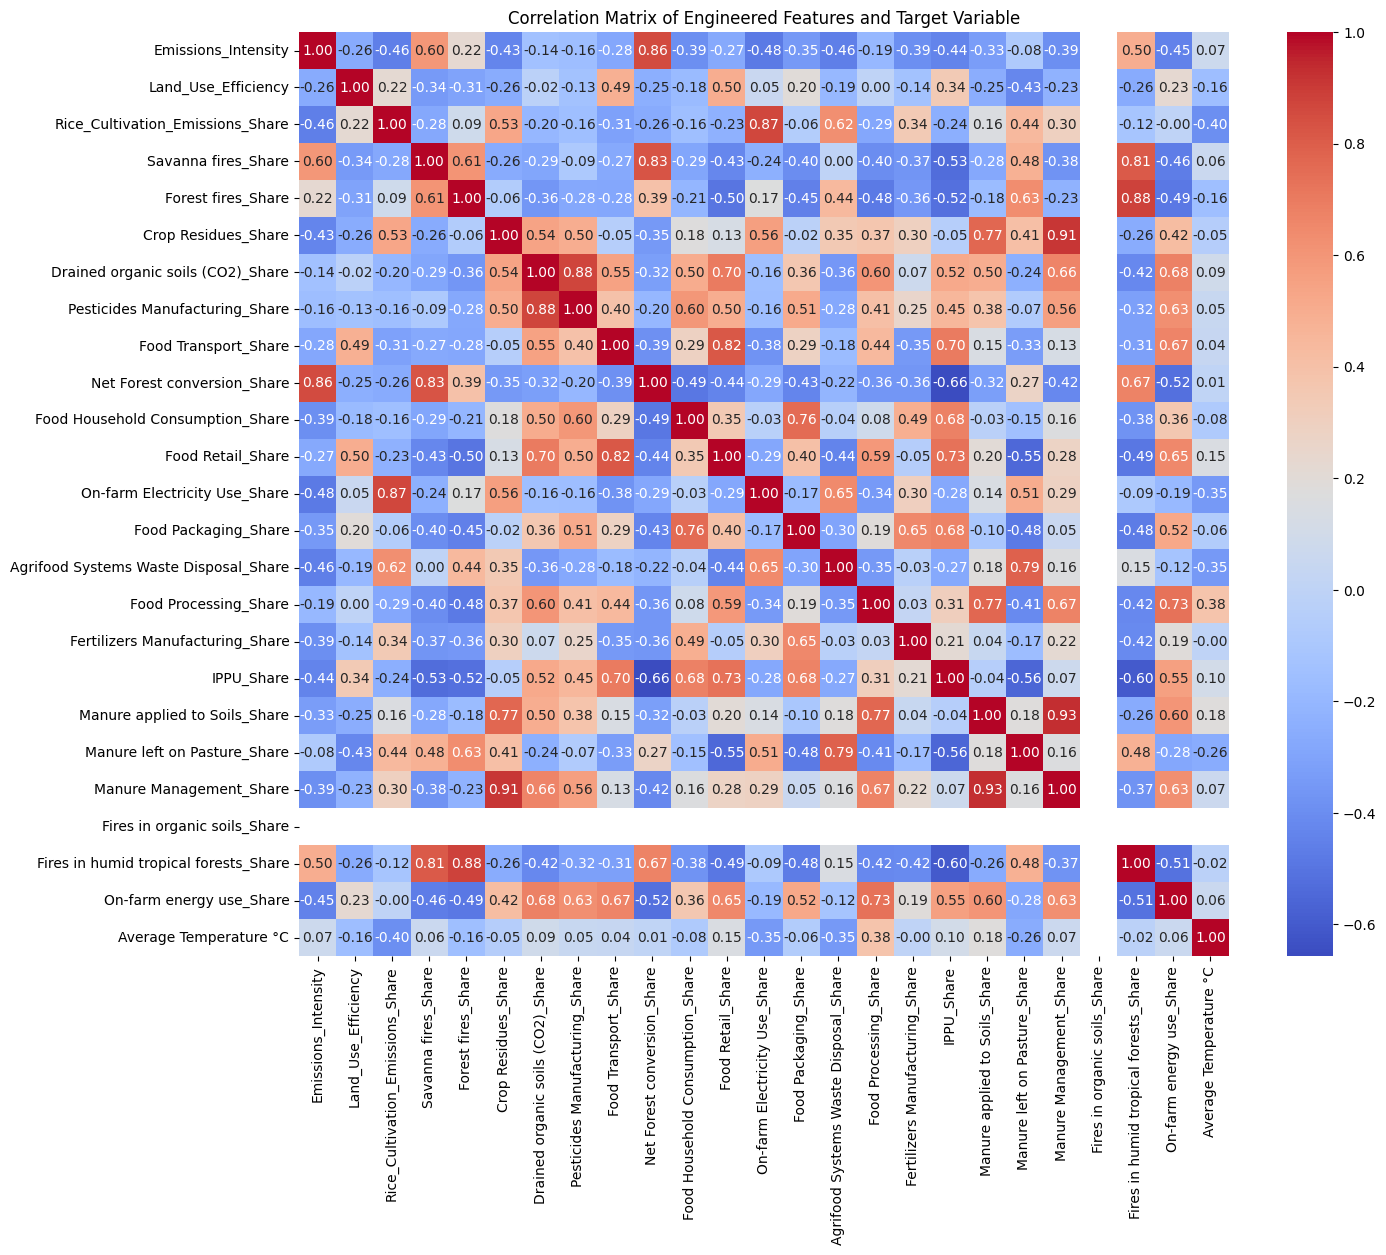

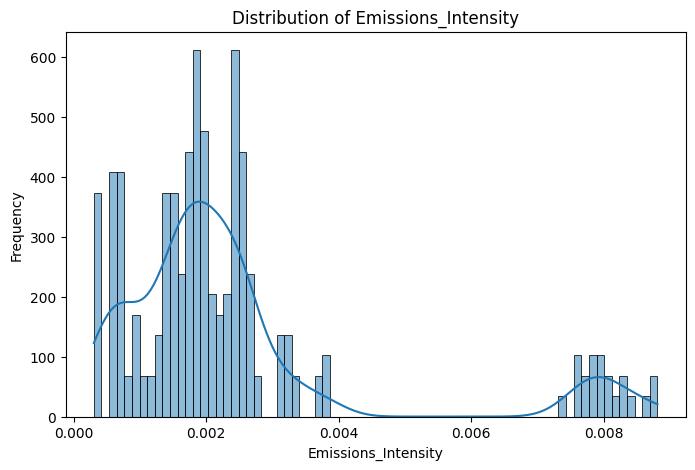

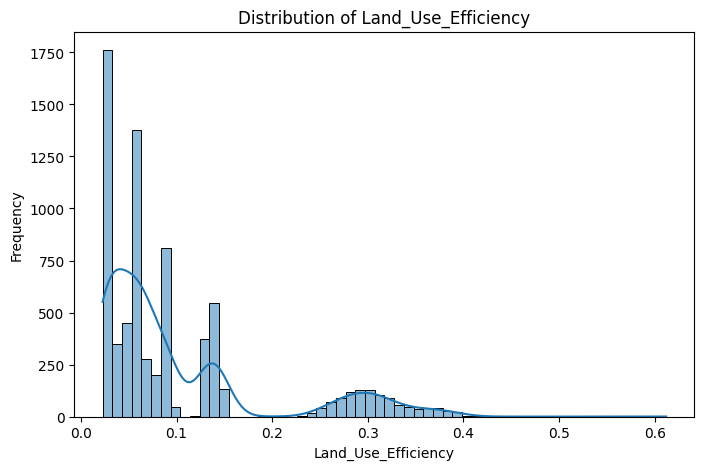

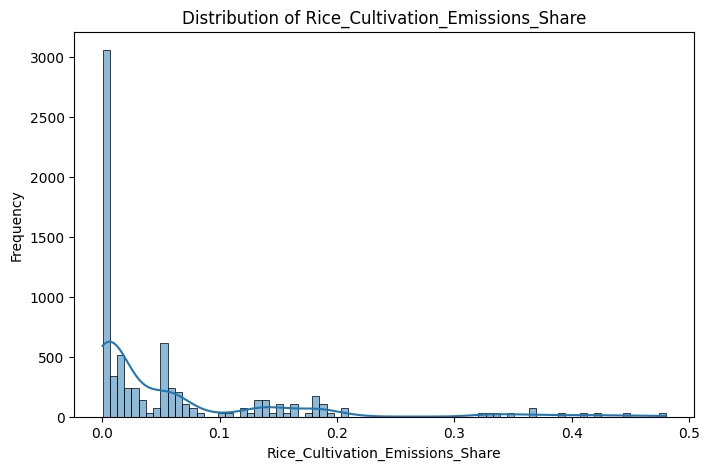

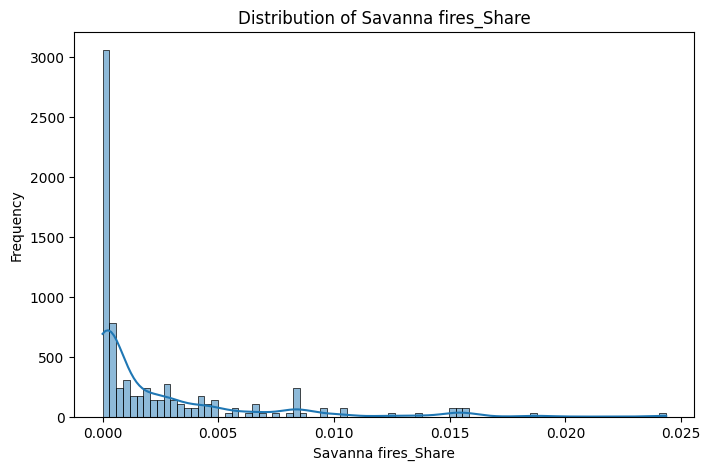

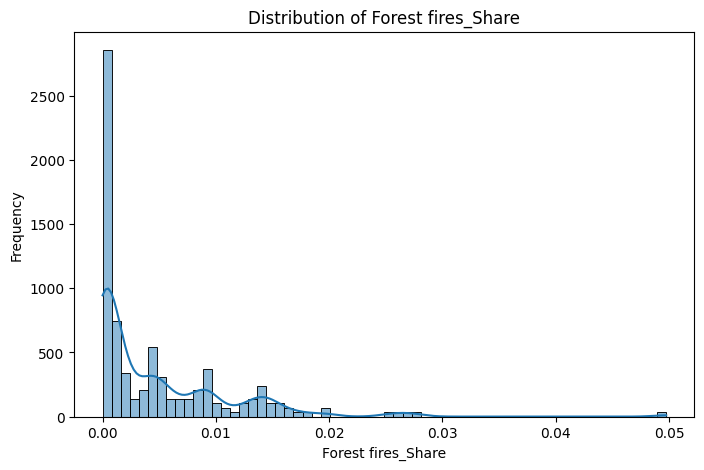

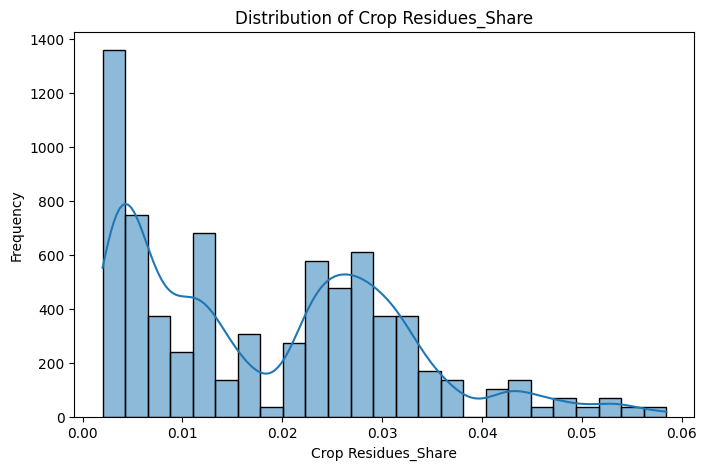

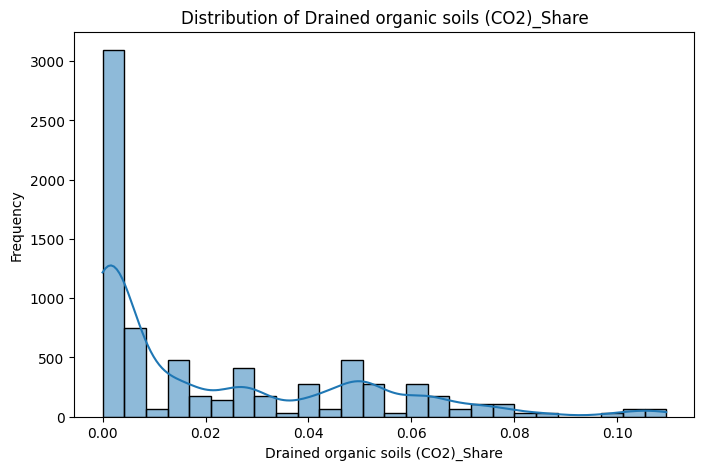

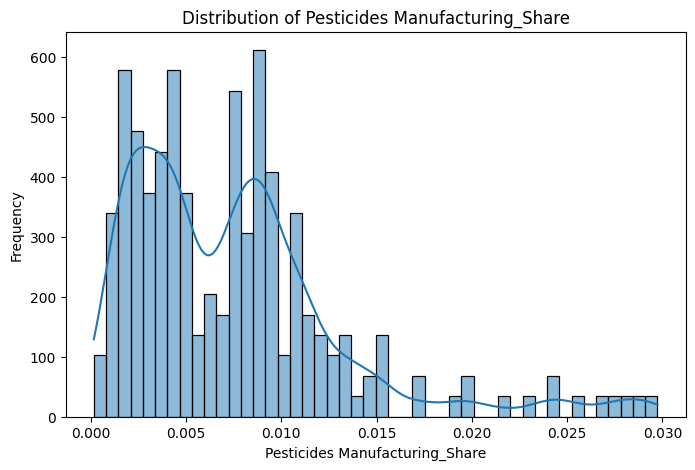

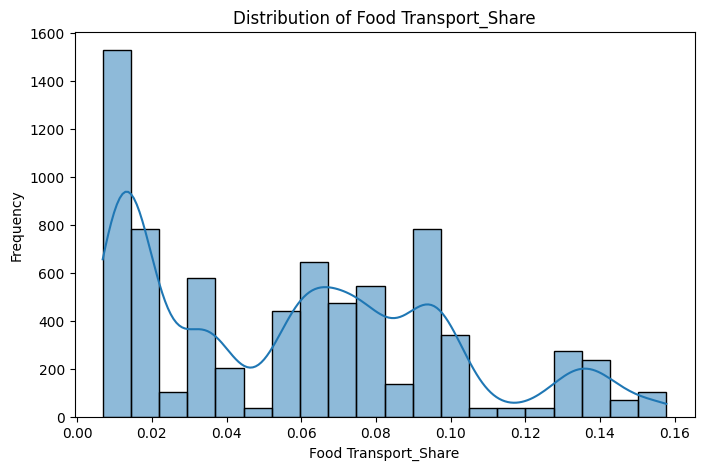

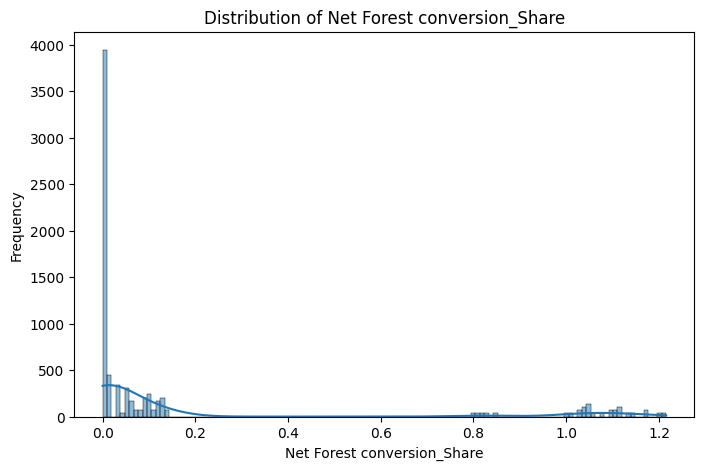

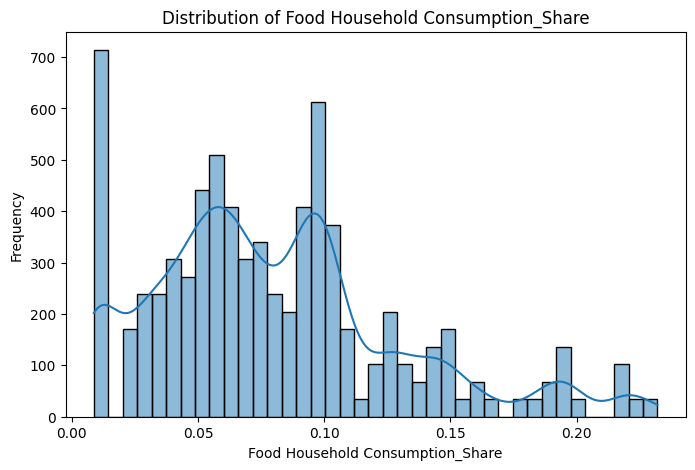

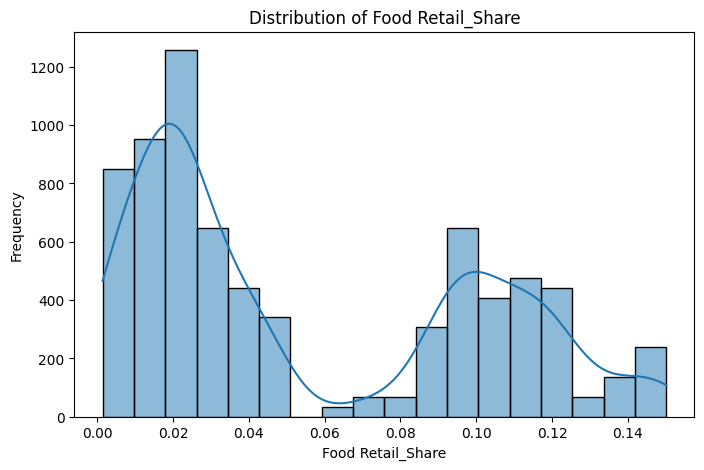

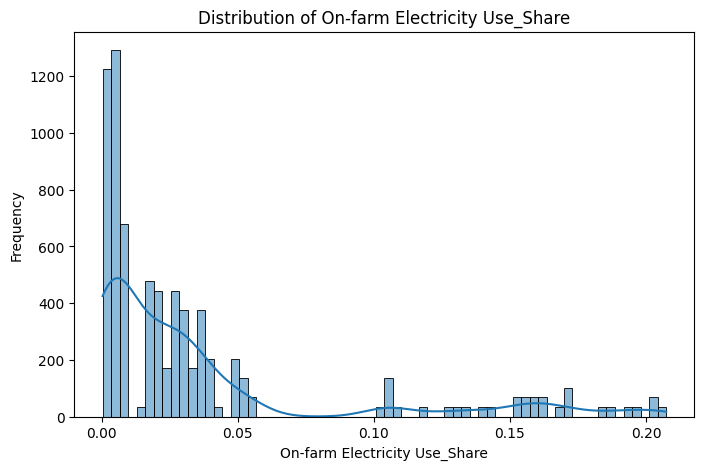

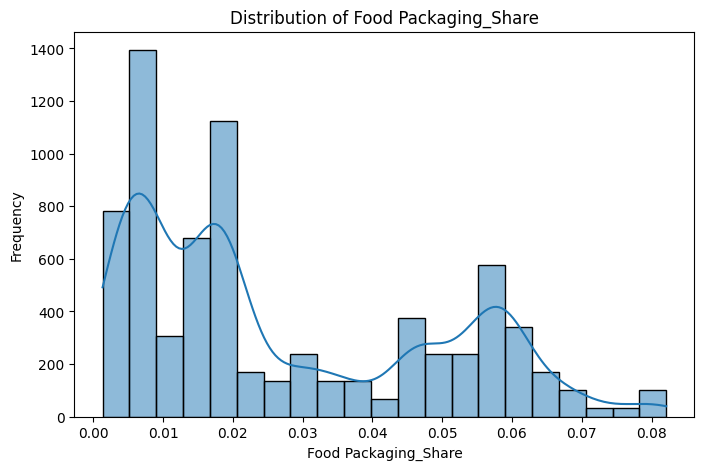

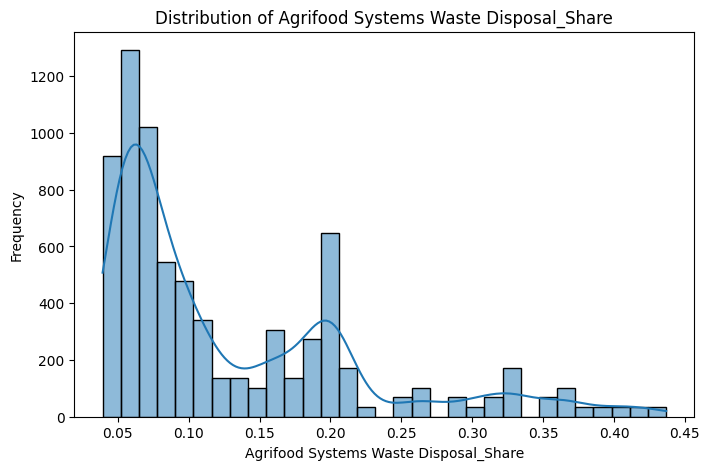

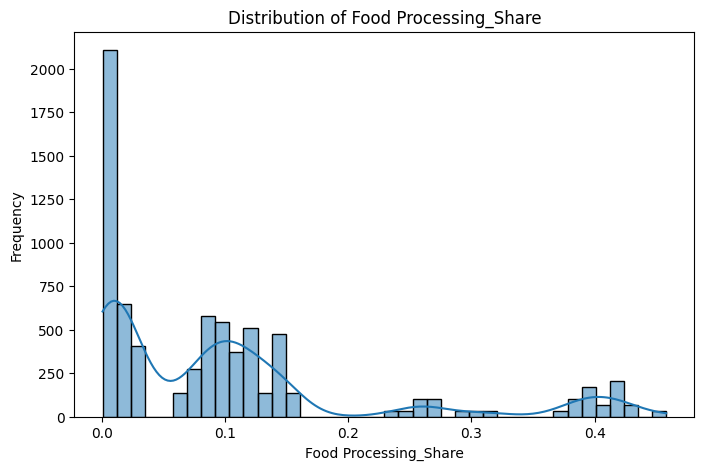

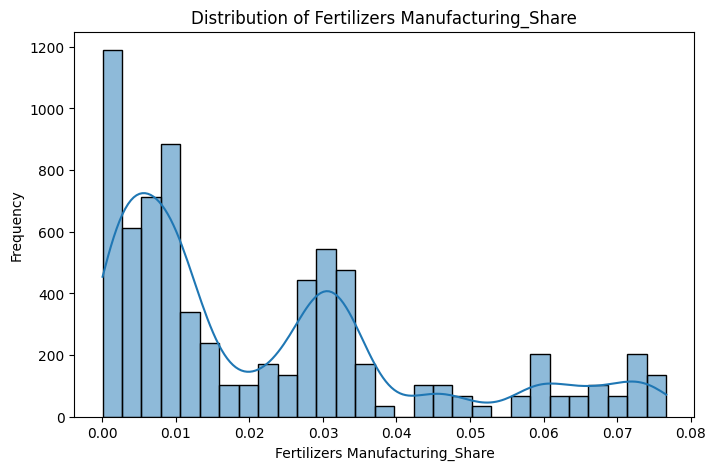

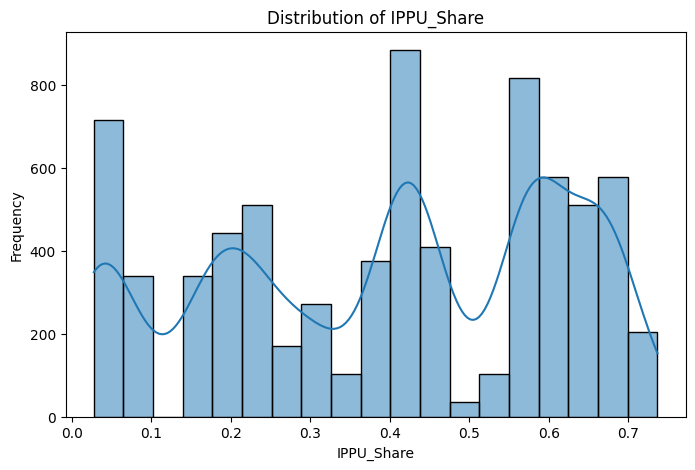

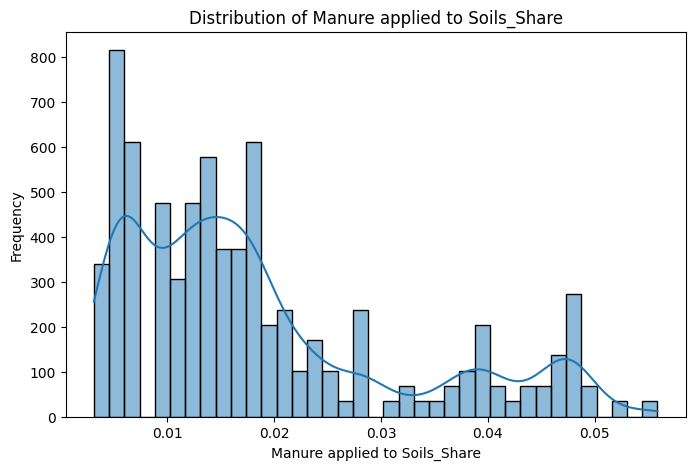

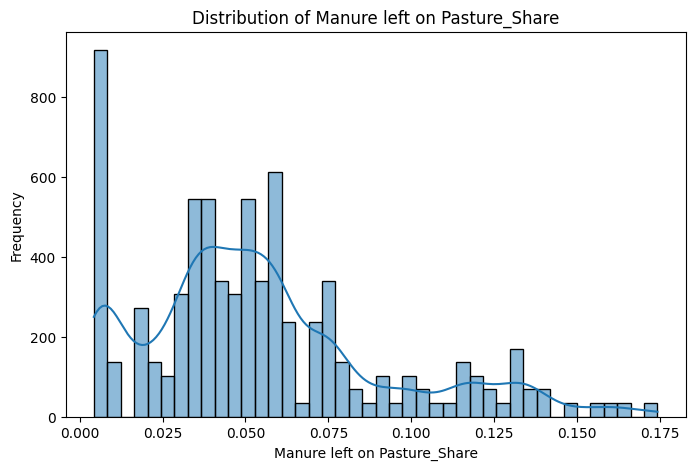

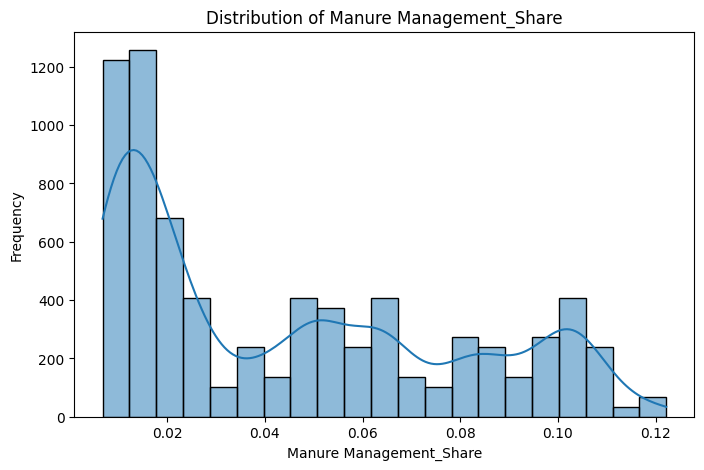

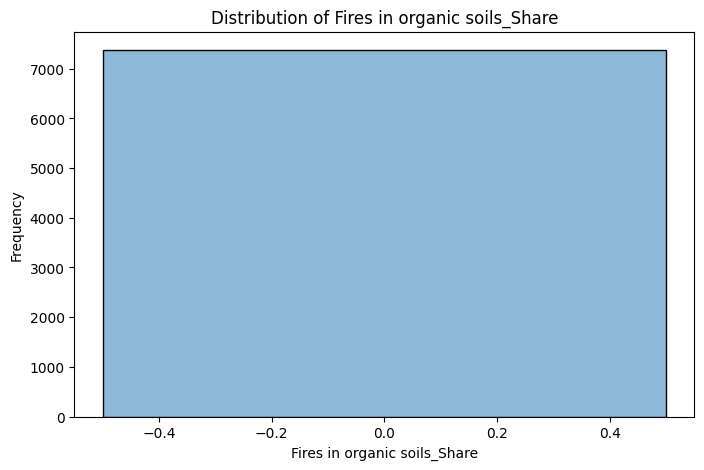

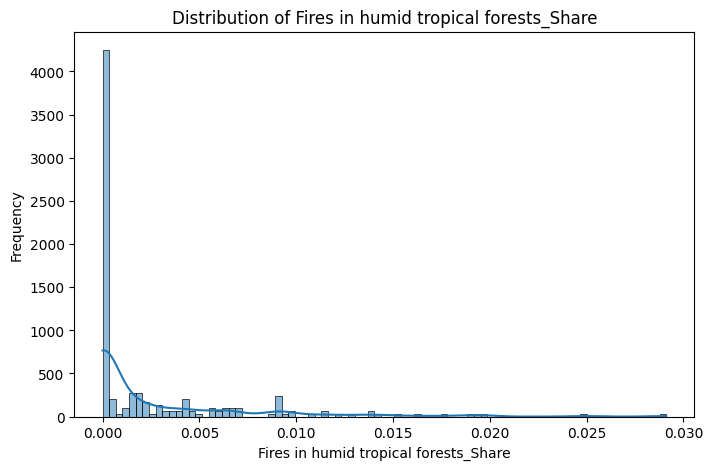

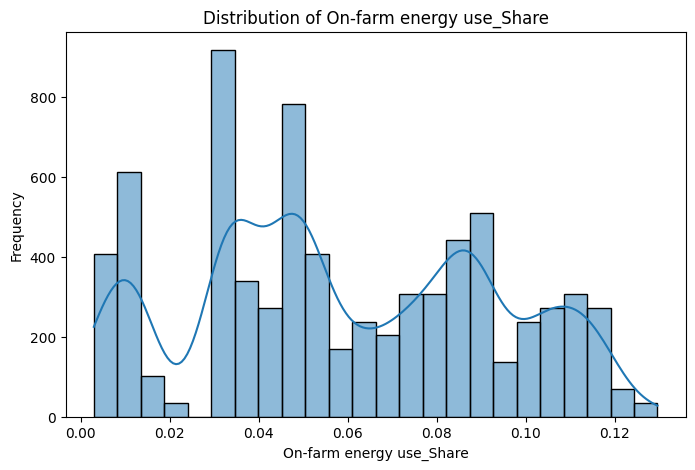

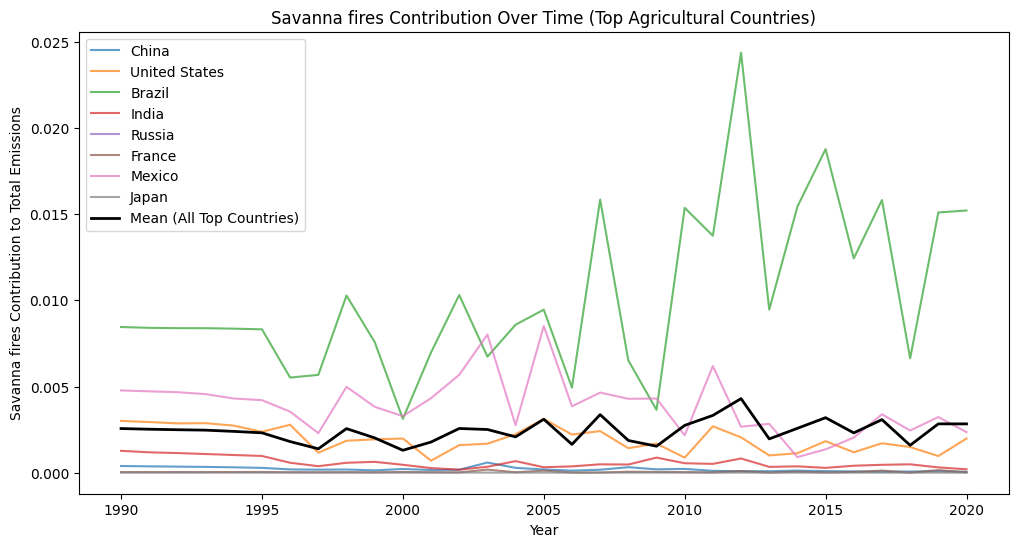

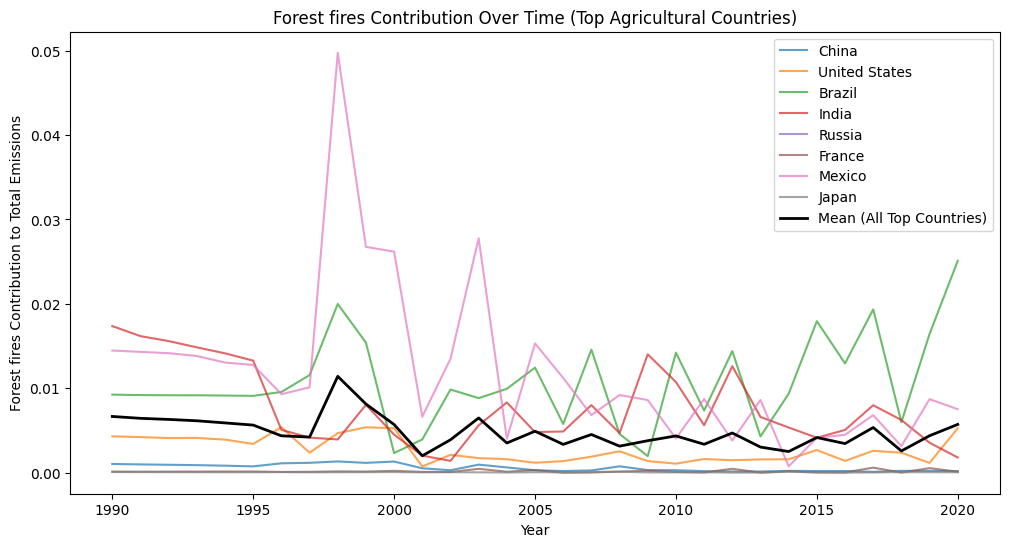

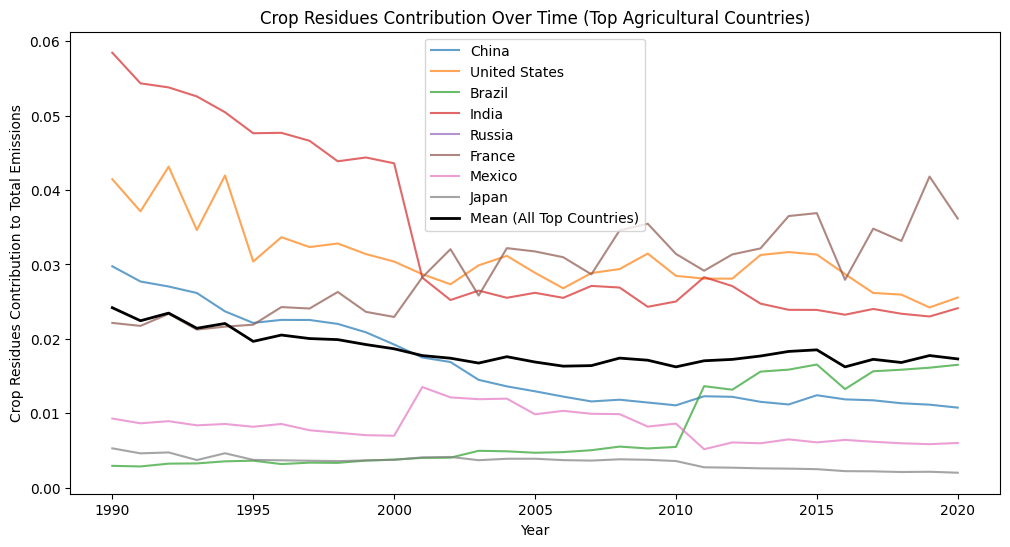

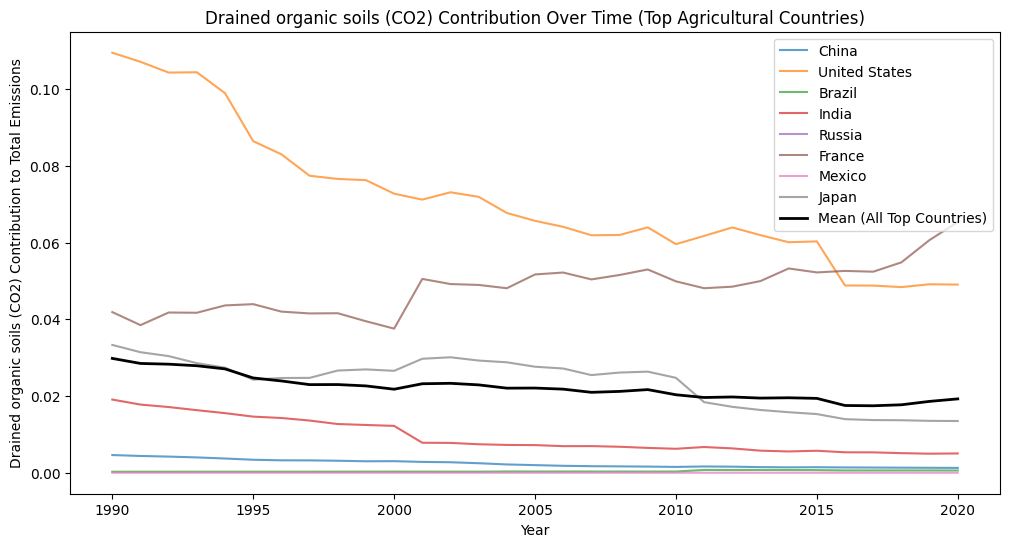

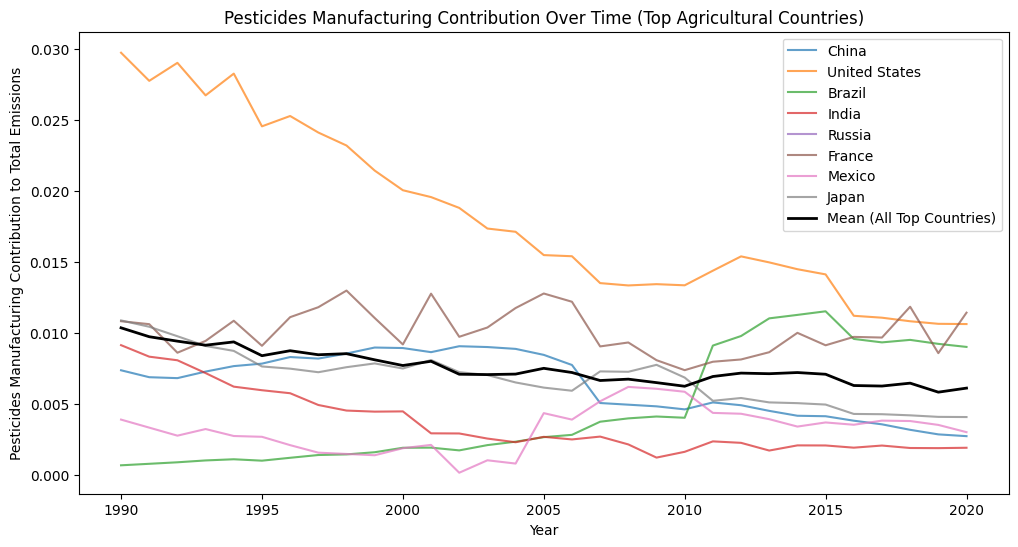

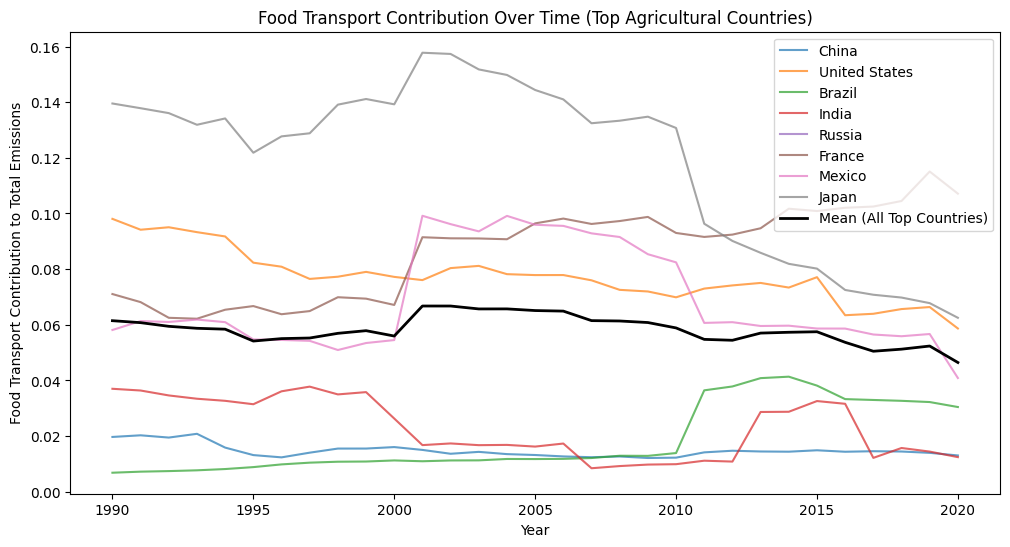

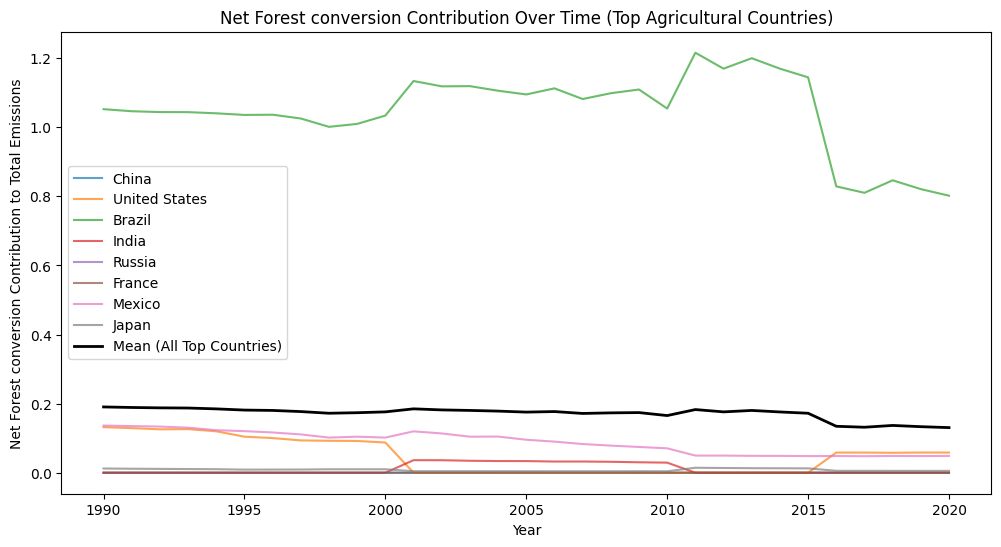

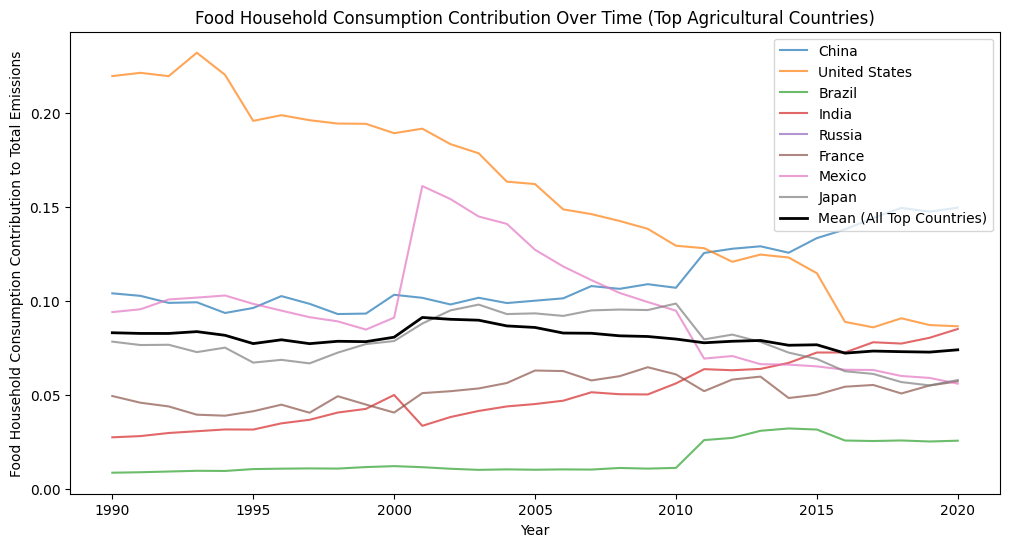

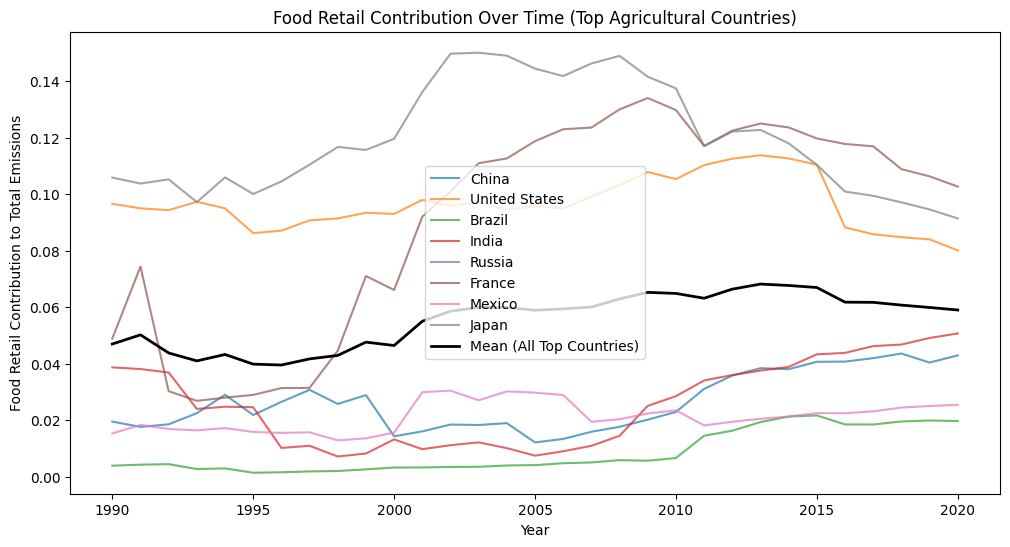

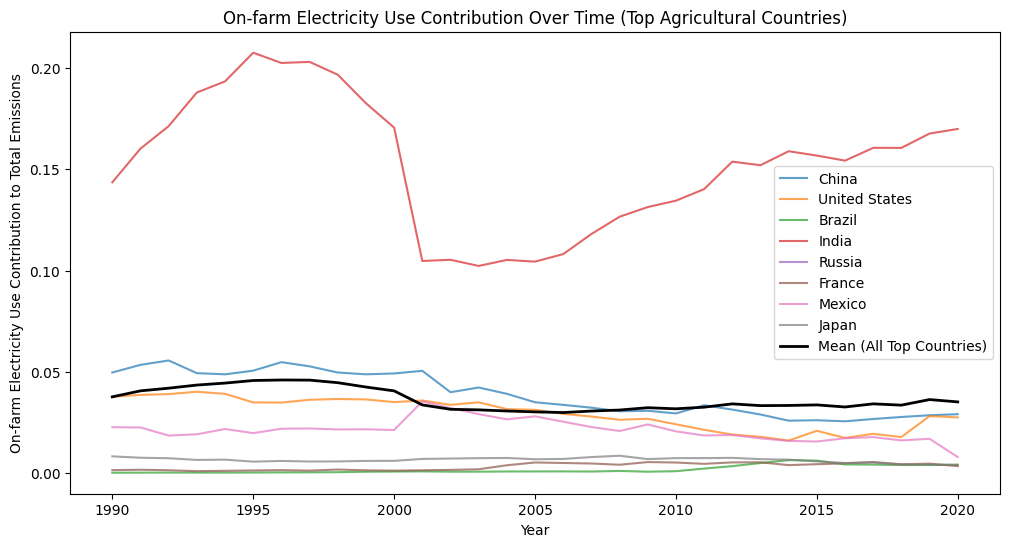

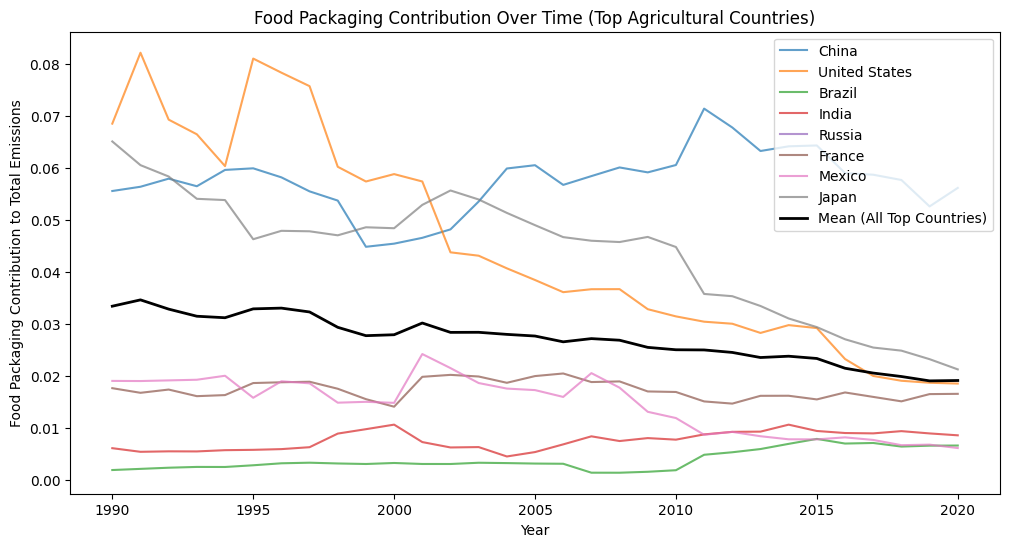

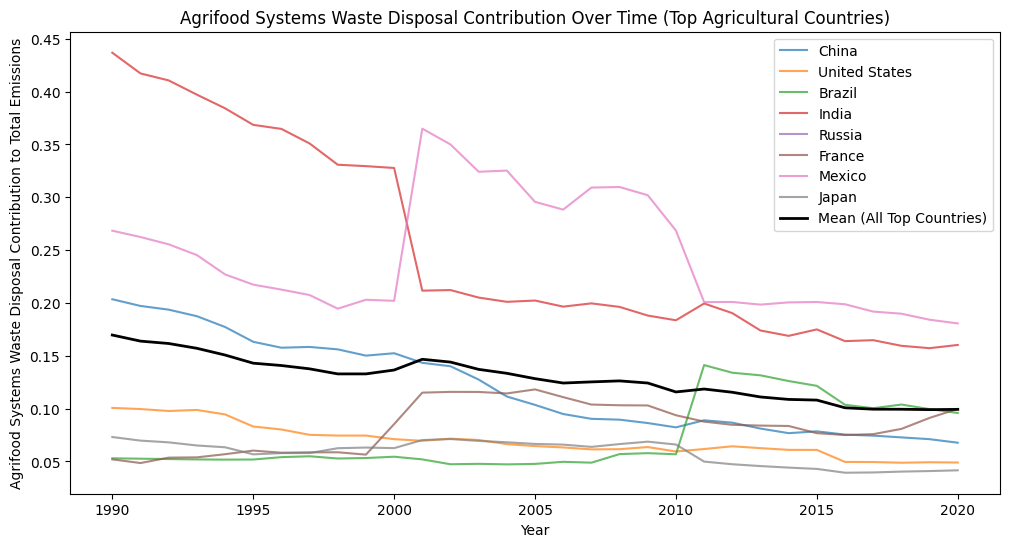

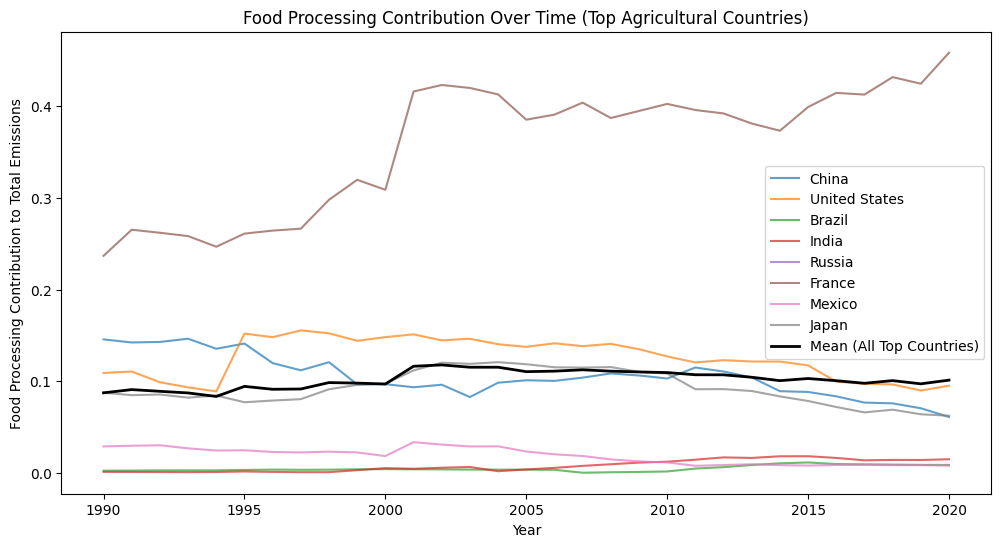

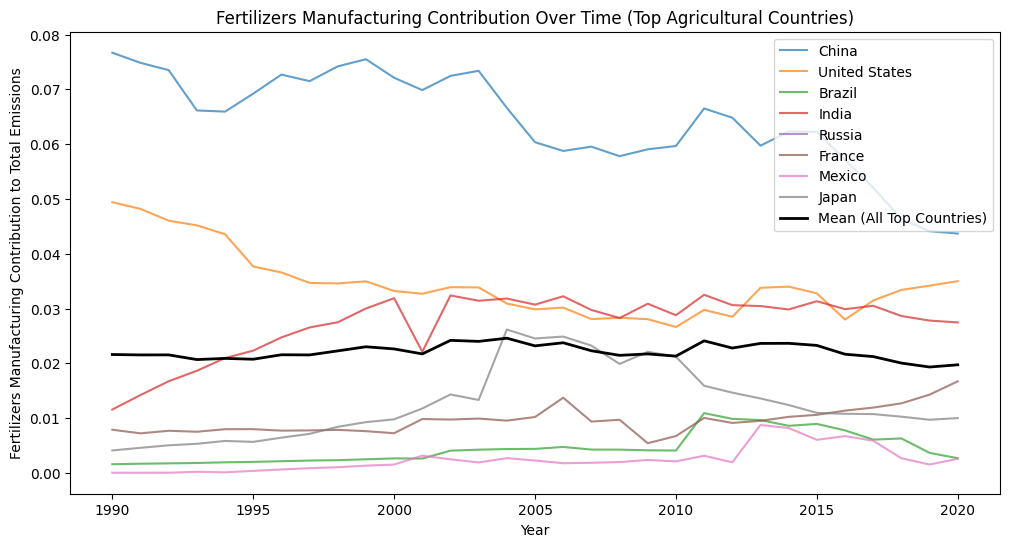

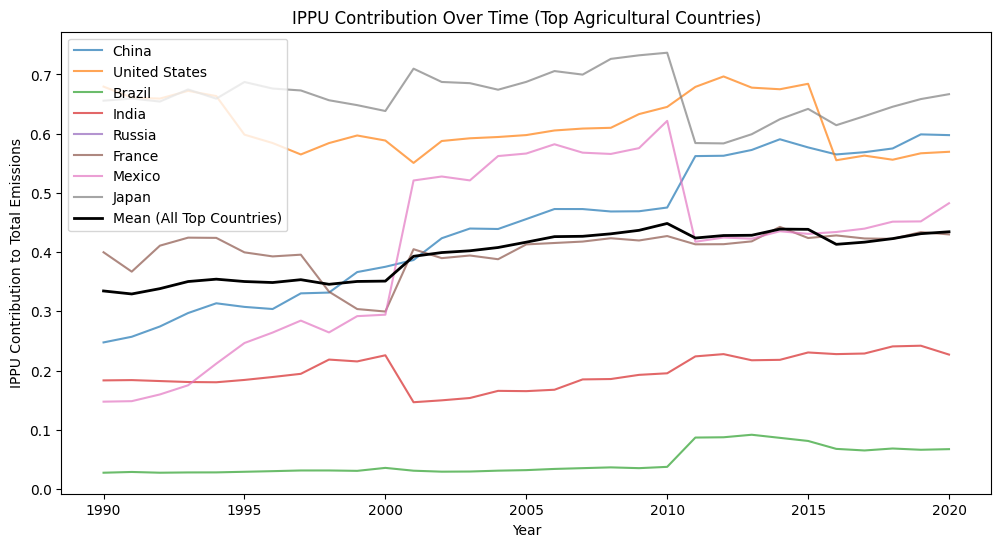

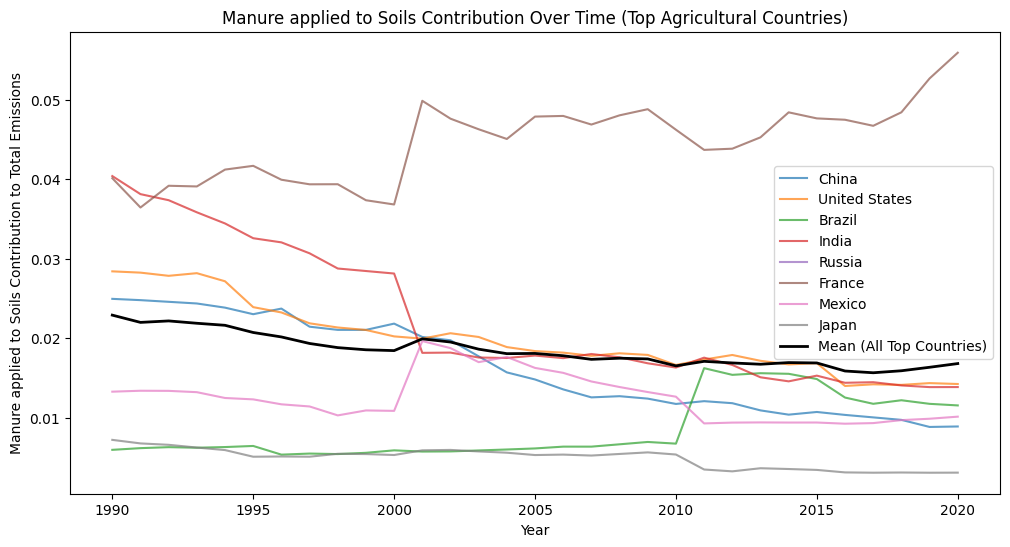

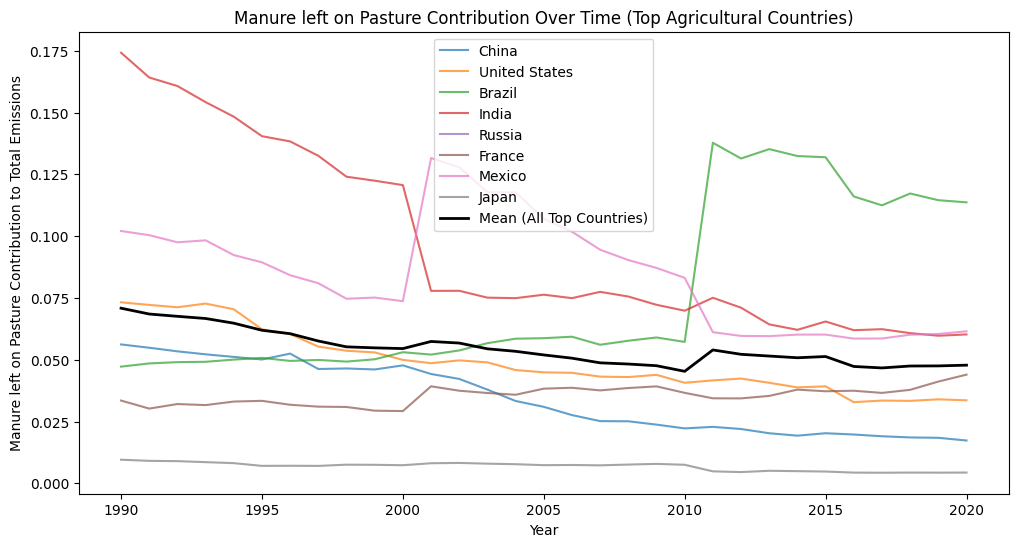

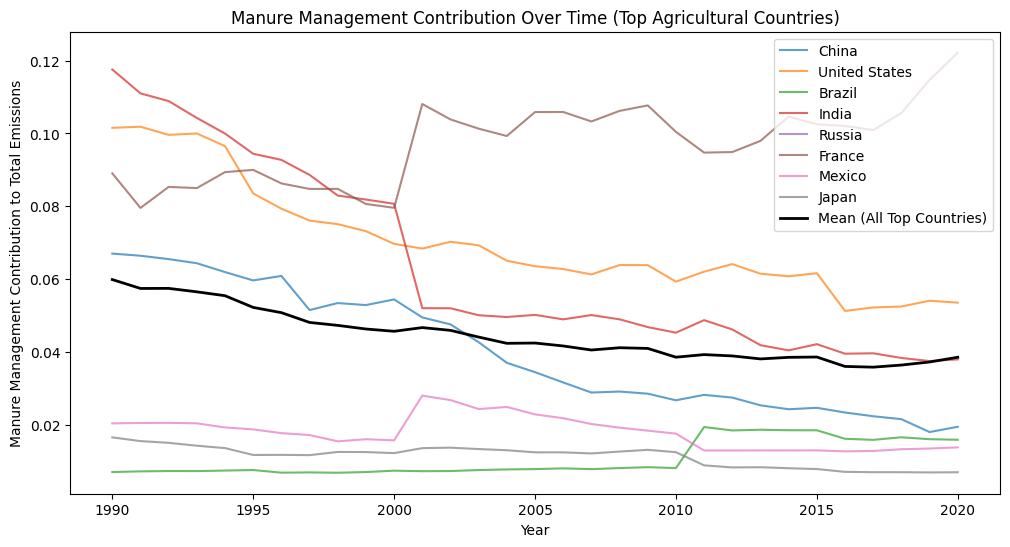

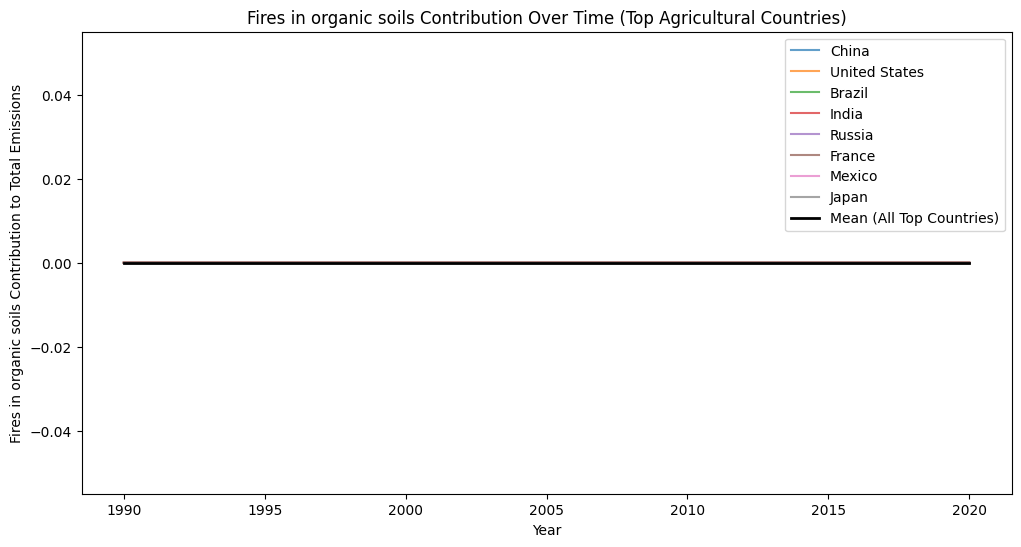

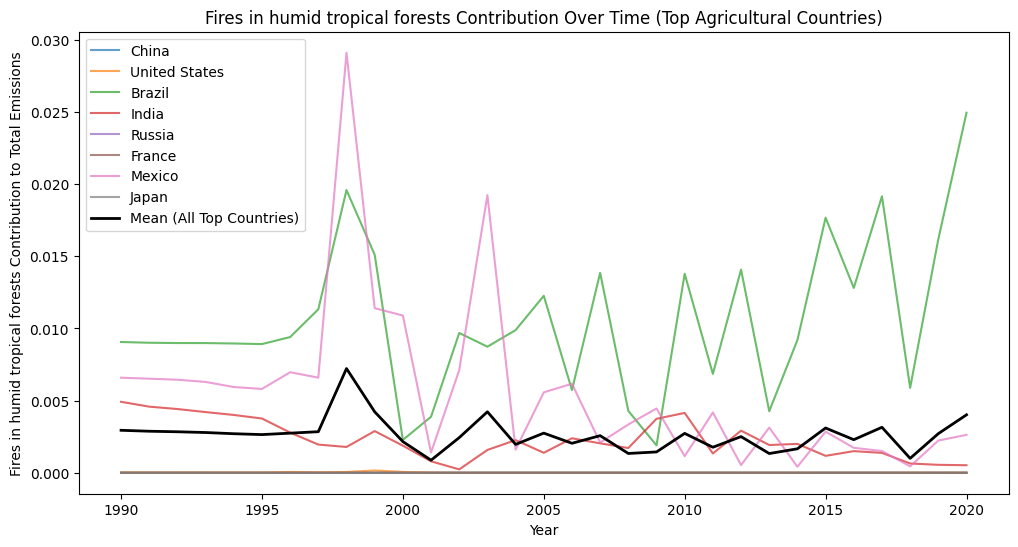

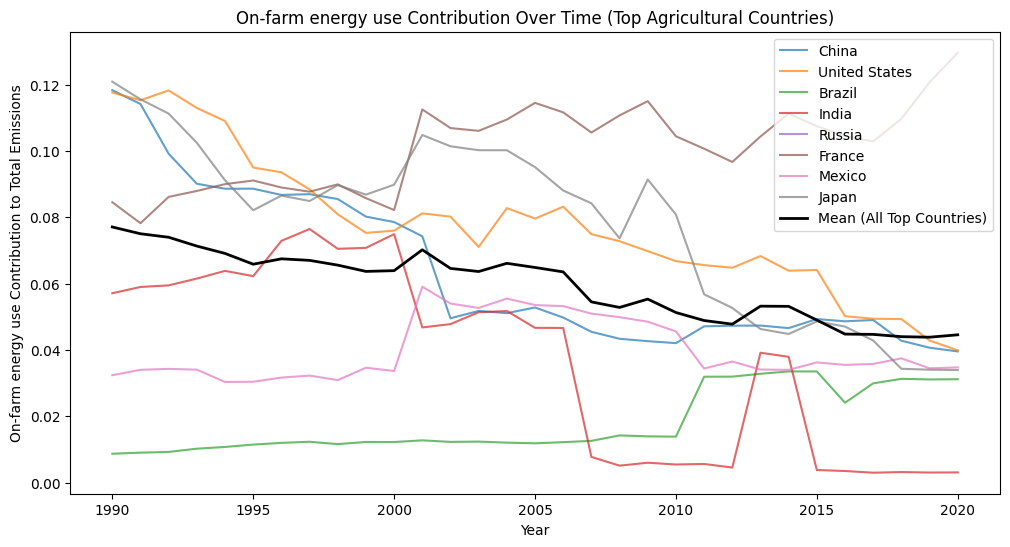

In [ ]:
# Basic Statistics
print("\nBasic Statistics for Newly Engineered Features:\n")
engineered_features = [
    'Emissions_Intensity', 'Land_Use_Efficiency', 'Rice_Cultivation_Emissions_Share'
] + [f'{feature}_Share' for feature in emissions_features]
print(top_countries_data[engineered_features].describe())

# Correlation Analysis
plt.figure(figsize=(15, 12))
corr_matrix = top_countries_data[engineered_features + ['Average Temperature °C']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Engineered Features and Target Variable')
plt.show()

# Feature Distribution
for feature in engineered_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(top_countries_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Emissions Trends Over Time
for feature in emissions_features:
    plt.figure(figsize=(12, 6))
    for country in top_countries:
        country_data = top_countries_data[top_countries_data['Area'] == country]
        plt.plot(country_data['Year'], country_data[f'{feature}_Share'], label=country, alpha=0.7)

    plt.plot(
        top_countries_data.groupby('Year')[f'{feature}_Share'].mean(),
        label='Mean (All Top Countries)', color='black', linewidth=2
    )
    plt.title(f'{feature} Contribution Over Time (Top Agricultural Countries)')
    plt.xlabel('Year')
    plt.ylabel(f'{feature} Contribution to Total Emissions')
    plt.legend()
    plt.show()


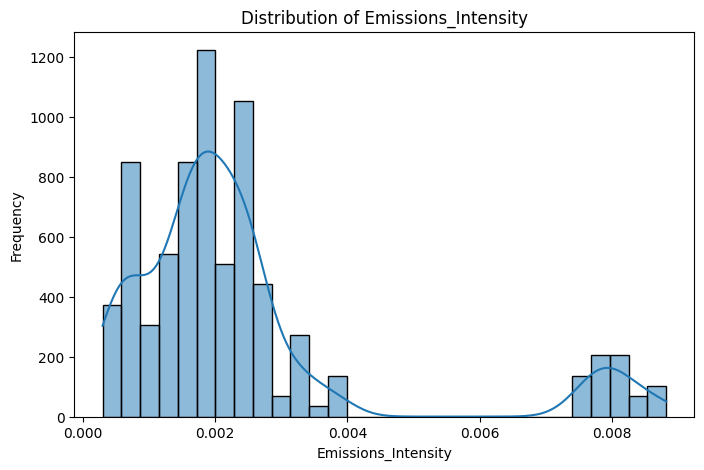

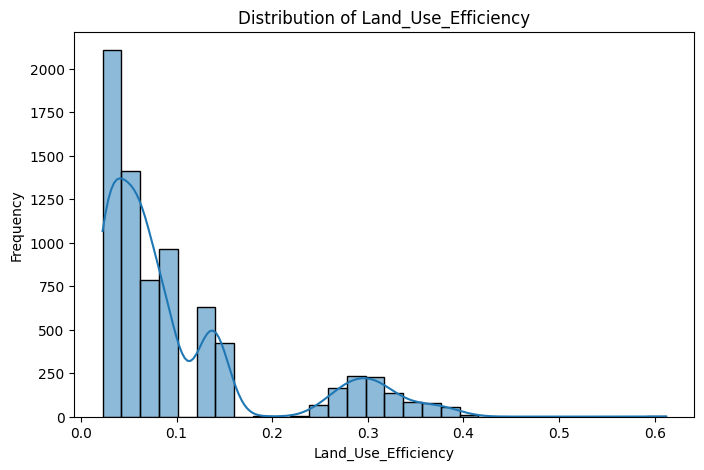

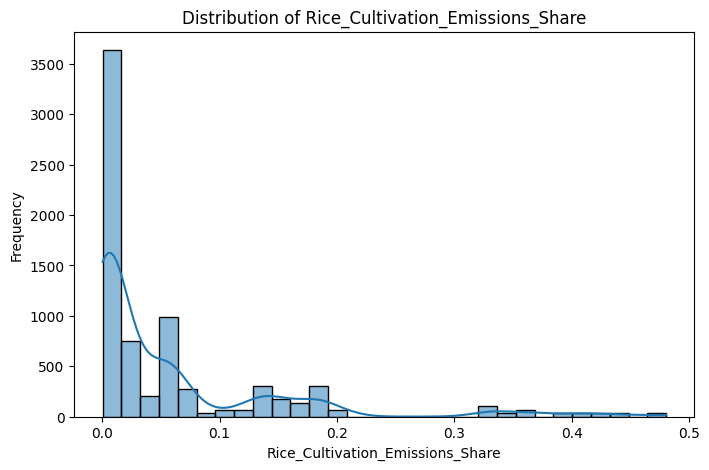

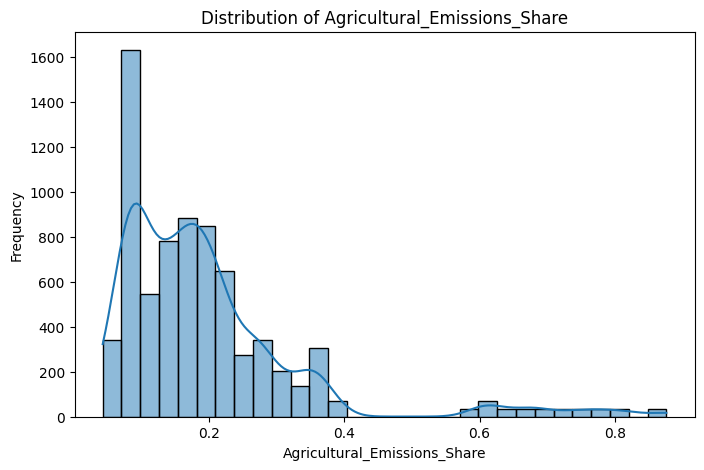

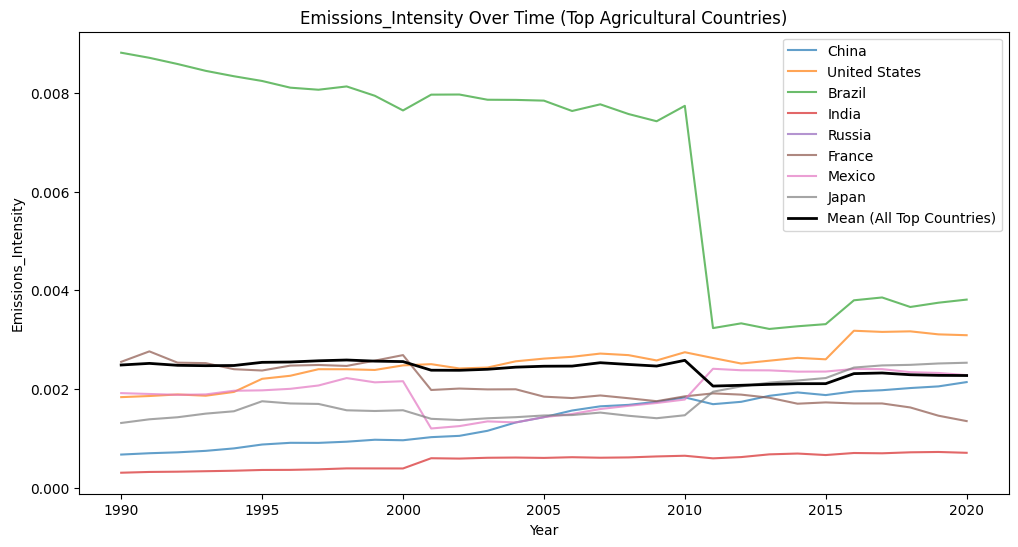

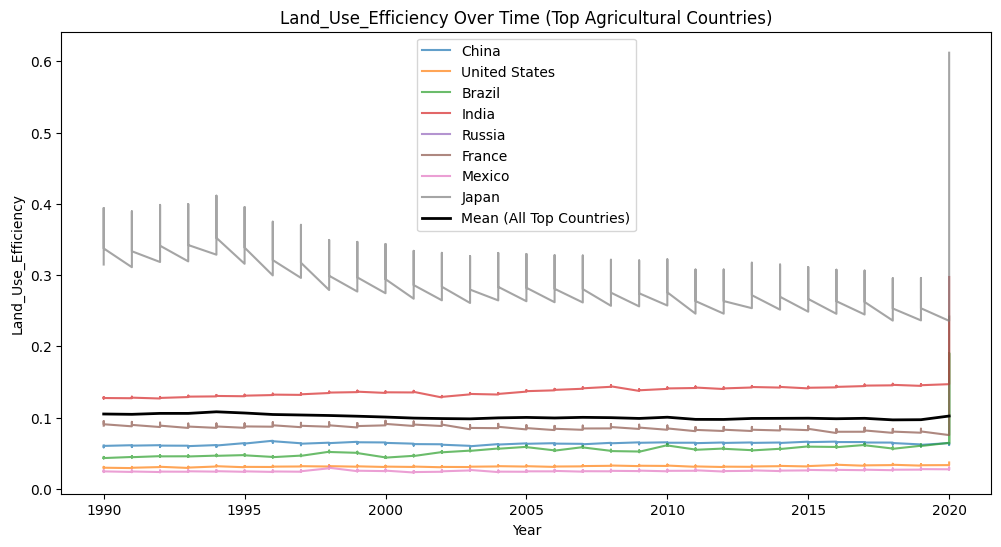

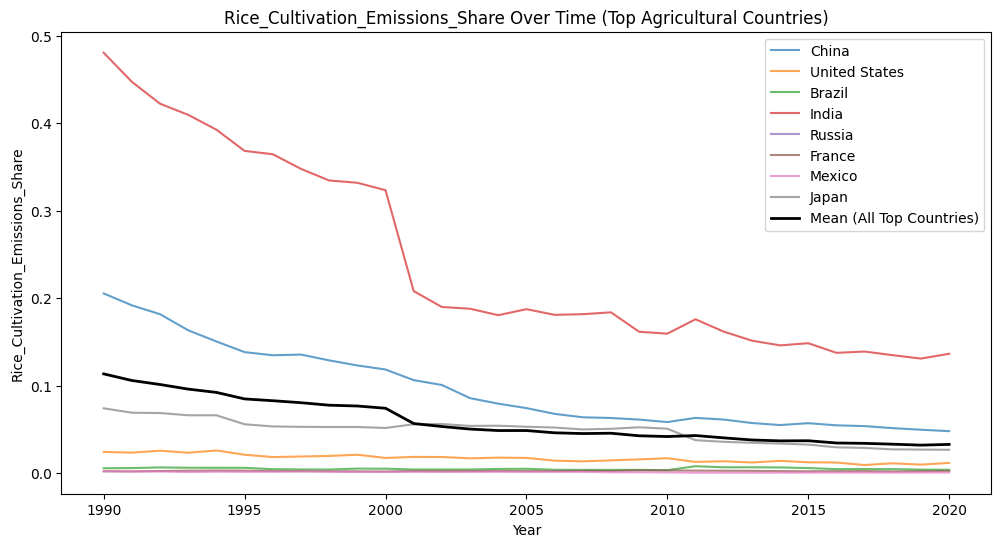

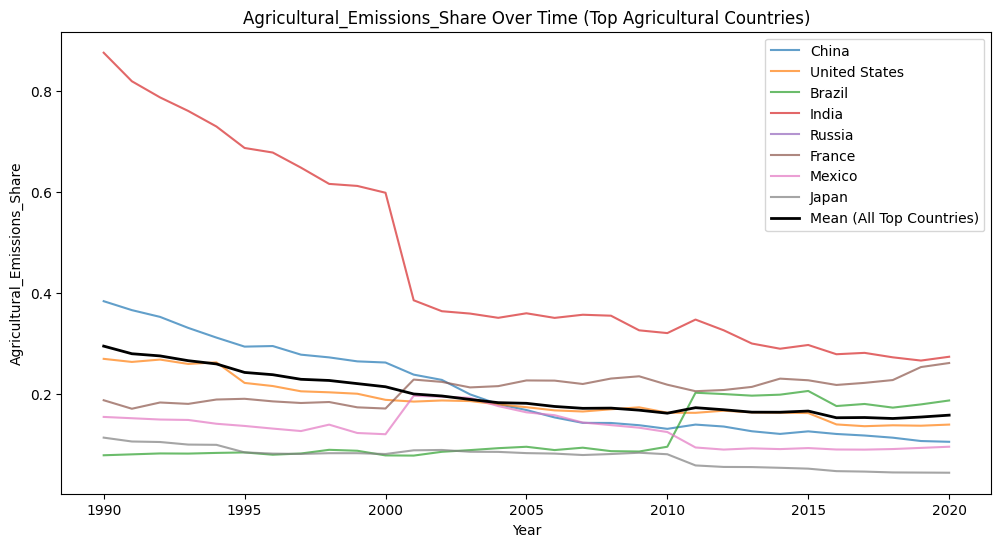

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of engineered columns to visualize
engineered_features = [
    'Emissions_Intensity',
    'Land_Use_Efficiency',
    'Rice_Cultivation_Emissions_Share',
    'Agricultural_Emissions_Share'
]

# Feature Distribution Visualizations
for feature in engineered_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(top_countries_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Trends Over Time for Engineered Features
for feature in engineered_features:
    plt.figure(figsize=(12, 6))
    for country in top_countries:
        country_data = top_countries_data[top_countries_data['Area'] == country]
        plt.plot(country_data['Year'], country_data[feature], label=country, alpha=0.7)

    mean_data = top_countries_data.groupby('Year')[feature].mean()
    plt.plot(mean_data.index, mean_data.values, label='Mean (All Top Countries)', color='black', linewidth=2)

    plt.title(f'{feature} Over Time (Top Agricultural Countries)')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.legend()
    plt.show()


In [ ]:
# Step 6: Basic Statistics
print("\nBasic Statistics:\n")
print(top_countries_data.describe())





Basic Statistics:

              Year  Savanna fires  Forest fires  Crop Residues  \
count  7378.000000    7378.000000   7378.000000    7378.000000   
mean   2005.000000    2000.094640   3118.864601   11727.980717   
std       8.944878    4111.717691   4758.862083   10377.285904   
min    1990.000000       0.182500      0.651000     641.264200   
25%    1997.000000       6.580500     26.670600    1800.971300   
50%    2005.000000     348.512800   1336.986500    7086.200200   
75%    2013.000000    1214.188700   3516.594900   21347.147300   
max    2020.000000   23503.321400  27663.502300   33490.074100   

       Rice Cultivation  Drained organic soils (CO2)  \
count       7378.000000                  7378.000000   
mean       43777.638647                 10083.712020   
std        60821.337570                 16639.114321   
min          102.201800                     0.000000   
25%          336.260700                   467.948100   
50%         9738.867600                  4945.166

In [ ]:
# Ensure necessary columns are present
required_columns = ['total_emission', 'Forestland', 'Rural population', 'Urban population']
for col in required_columns:
    if col not in top_countries_data.columns:
        raise ValueError(f"Missing required column: {col}")

# Calculate total population
top_countries_data['Total_Population'] = (
    top_countries_data['Rural population'] + top_countries_data['Urban population']
)

# Calculate net emissions considering Forestland absorption
top_countries_data['Net_Emissions'] = (
    top_countries_data['total_emission'] + top_countries_data['Forestland']
)

# Calculate per capita net emissions
top_countries_data['Per_Capita_Net_Emissions'] = (
    top_countries_data['Net_Emissions'] / top_countries_data['Total_Population']
)

# Calculate thresholds based on quartiles
q1 = top_countries_data['Per_Capita_Net_Emissions'].quantile(0.25)
q3 = top_countries_data['Per_Capita_Net_Emissions'].quantile(0.75)

# Create multi-class sustainability labels
def redefine_label(row):
    if row['Per_Capita_Net_Emissions'] <= q1:
        return 'sustainable'
    elif row['Per_Capita_Net_Emissions'] > q3:
        return 'unsustainable'
    else:
        return 'moderate'

top_countries_data['Sustainability_Label'] = top_countries_data.apply(redefine_label, axis=1)

# Verify the distribution of labels
print("Sustainability Label Distribution:")
print(top_countries_data['Sustainability_Label'].value_counts())



Sustainability Label Distribution:
Sustainability_Label
moderate         3672
sustainable      1870
unsustainable    1836
Name: count, dtype: int64


<ipython-input-12-85bec19d6ff3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries_data['Total_Population'] = (
<ipython-input-12-85bec19d6ff3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries_data['Net_Emissions'] = (
<ipython-input-12-85bec19d6ff3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [ ]:
top_countries_data['Sustainability_Label'].unique()

array(['unsustainable', 'sustainable', 'moderate'], dtype=object)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Classification Report:


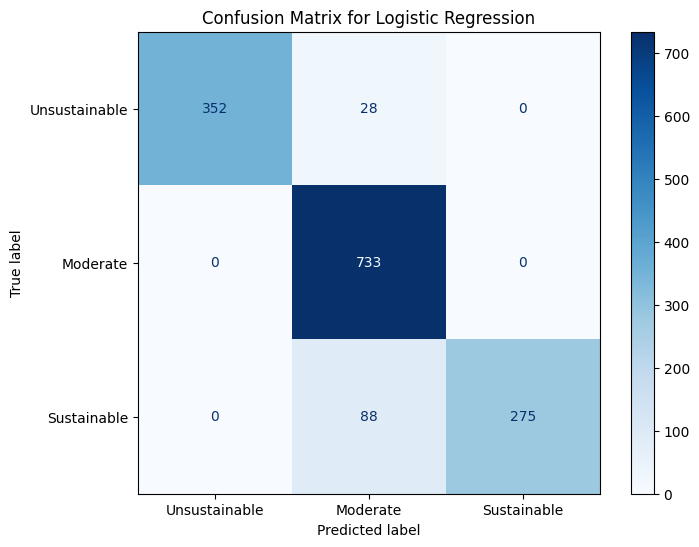

               precision    recall  f1-score   support

Unsustainable       1.00      0.93      0.96       380
     Moderate       0.86      1.00      0.93       733
  Sustainable       1.00      0.76      0.86       363

     accuracy                           0.92      1476
    macro avg       0.95      0.89      0.92      1476
 weighted avg       0.93      0.92      0.92      1476

Confusion Matrix:
[[352  28   0]
 [  0 733   0]
 [  0  88 275]]
ROC-AUC Score:
0.9854970683305244


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

# Step 1: Prepare features and target
features = [
    'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation',
    'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport',
    'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
    'On-farm Electricity Use', 'Food Packaging', 'Agrifood Systems Waste Disposal',
    'Food Processing', 'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
    'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
    'Fires in humid tropical forests', 'On-farm energy use', 'total_emission',
    'Per_Capita_Net_Emissions'
]
X = top_countries_data[features]
y = top_countries_data['Sustainability_Label'].apply(
    lambda x: 0 if x == 'unsustainable' else 1 if x == 'moderate' else 2
)  # Encode multi-class labels

# Normalize features
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=features)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Step 3: Logistic Regression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
probs = log_reg.predict_proba(X_test)

# Step 4: Evaluation
print("Logistic Regression Classification Report:")

# Visualization of Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    log_reg, X_test, y_test, display_labels=['Unsustainable', 'Moderate', 'Sustainable'], cmap='Blues', ax=ax
)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()
print(classification_report(y_test, y_pred, target_names=['Unsustainable', 'Moderate', 'Sustainable']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, probs, multi_class='ovr'))


Gradient Boosting Regressor Metrics:
Mean Squared Error: 0.0031
R^2 Score: 0.9855

Feature Importances:
                            Feature  Importance
15                             IPPU    0.158619
8        Food Household Consumption    0.126323
22                   total_emission    0.109188
3                  Rice Cultivation    0.088522
17           Manure left on Pasture    0.077111
9                       Food Retail    0.063112
11                   Food Packaging    0.047840
13                  Food Processing    0.044674
2                     Crop Residues    0.032170
14        Fertilizers Manufacturing    0.030751
12  Agrifood Systems Waste Disposal    0.029698
6                    Food Transport    0.026798
10          On-farm Electricity Use    0.025706
5          Pesticides Manufacturing    0.023869
21               On-farm energy use    0.023746
18                Manure Management    0.022713
0                     Savanna fires    0.021492
4       Drained organic soils (C

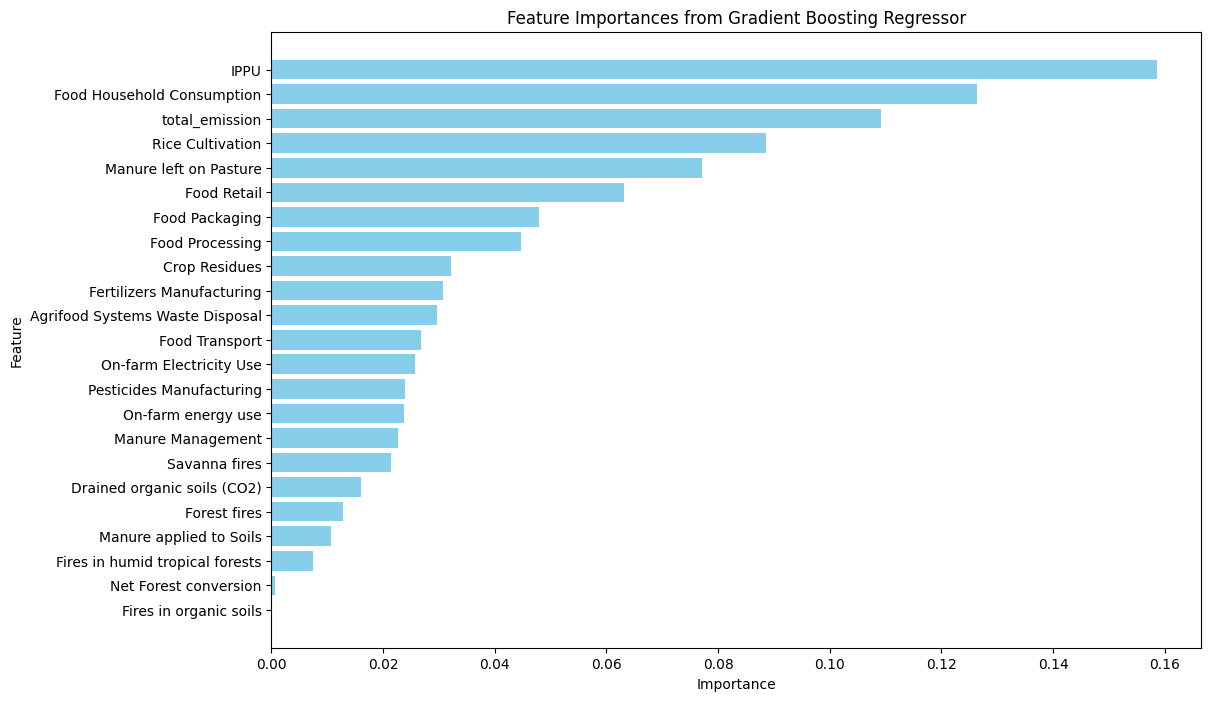

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Step 1: Prepare features and target
features = [
    'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation',
    'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport',
    'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
    'On-farm Electricity Use', 'Food Packaging', 'Agrifood Systems Waste Disposal',
    'Food Processing', 'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
    'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
    'Fires in humid tropical forests', 'On-farm energy use', 'total_emission'
]
X = top_countries_data[features]
y = top_countries_data['Average Temperature °C']

# Normalize features
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=features)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Step 3: Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = gb_model.predict(X_test)

# Step 5: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor Metrics:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Plot Feature Importances
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


Gradient Boosting Regressor Metrics:
Mean Squared Error: 0.0031
R^2 Score: 0.9855


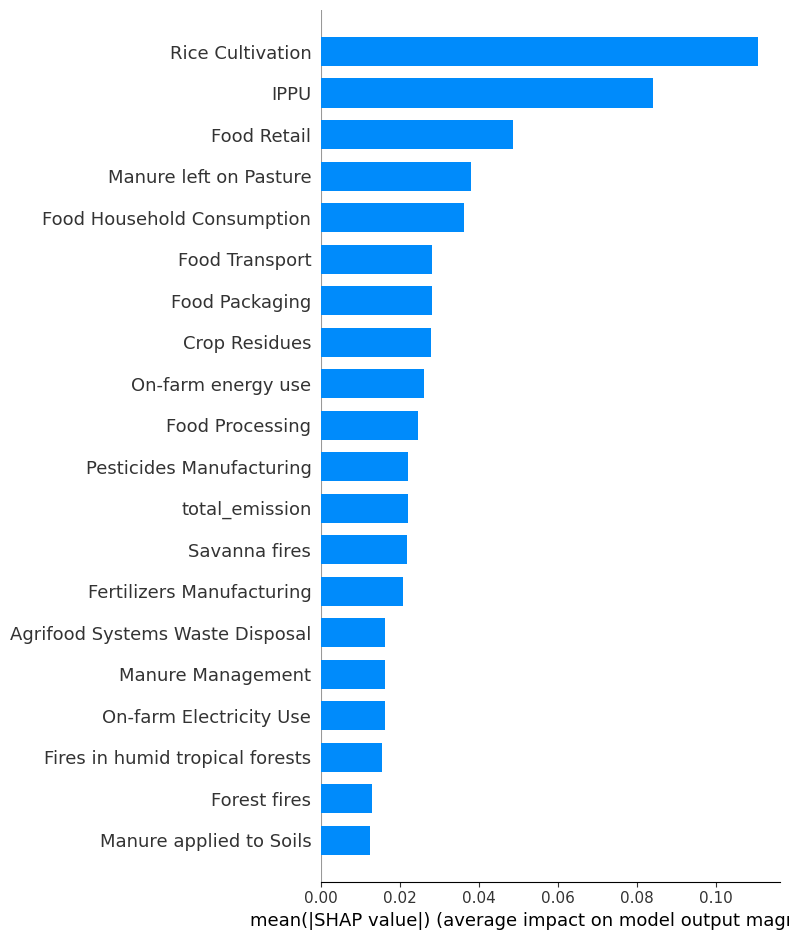


Feature Importances:
                            Feature  Importance
15                             IPPU    0.158619
8        Food Household Consumption    0.126323
22                   total_emission    0.109188
3                  Rice Cultivation    0.088522
17           Manure left on Pasture    0.077111
9                       Food Retail    0.063112
11                   Food Packaging    0.047840
13                  Food Processing    0.044674
2                     Crop Residues    0.032170
14        Fertilizers Manufacturing    0.030751
12  Agrifood Systems Waste Disposal    0.029698
6                    Food Transport    0.026798
10          On-farm Electricity Use    0.025706
5          Pesticides Manufacturing    0.023869
21               On-farm energy use    0.023746
18                Manure Management    0.022713
0                     Savanna fires    0.021492
4       Drained organic soils (CO2)    0.016027
1                      Forest fires    0.012839
16          Manure

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import shap
import matplotlib.pyplot as plt

# Step 1: Prepare features and target
features = [
    'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation',
    'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport',
    'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
    'On-farm Electricity Use', 'Food Packaging', 'Agrifood Systems Waste Disposal',
    'Food Processing', 'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
    'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
    'Fires in humid tropical forests', 'On-farm energy use', 'total_emission'
]
X = top_countries_data[features]
y = top_countries_data['Average Temperature °C']

# Normalize features
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=features)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Step 3: Train Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = gb_model.predict(X_test)

# Step 5: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor Metrics:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Feature Importance using SHAP
explainer = shap.Explainer(gb_model, X_train)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


XGBoost Regressor Metrics:
Mean Squared Error: 0.0025
R^2 Score: 0.9885


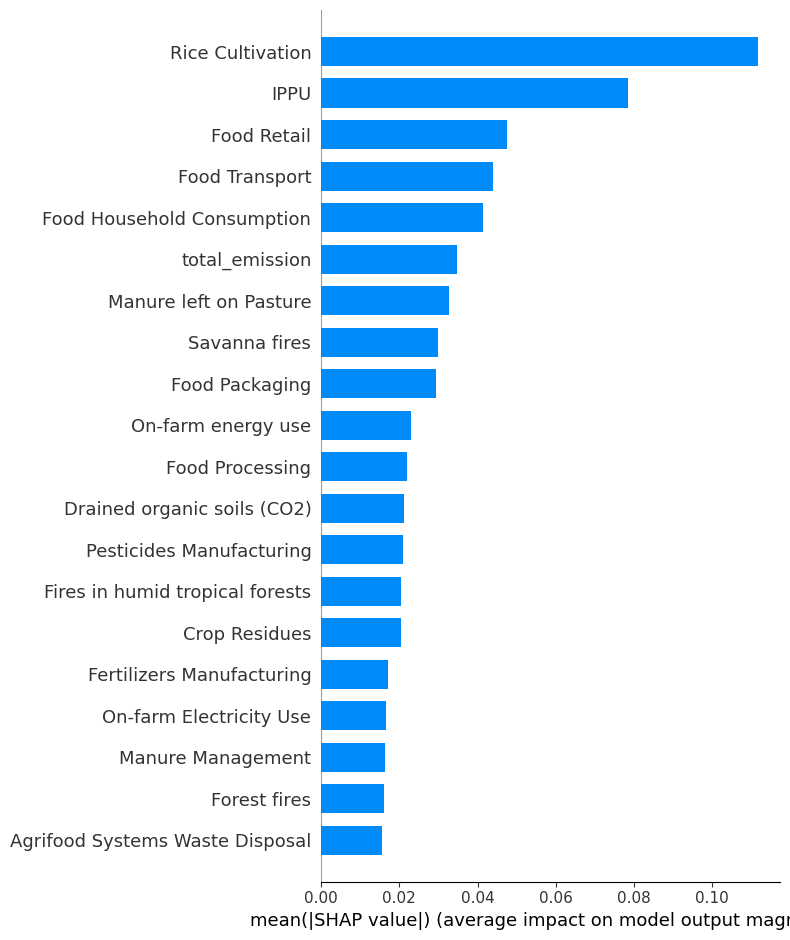

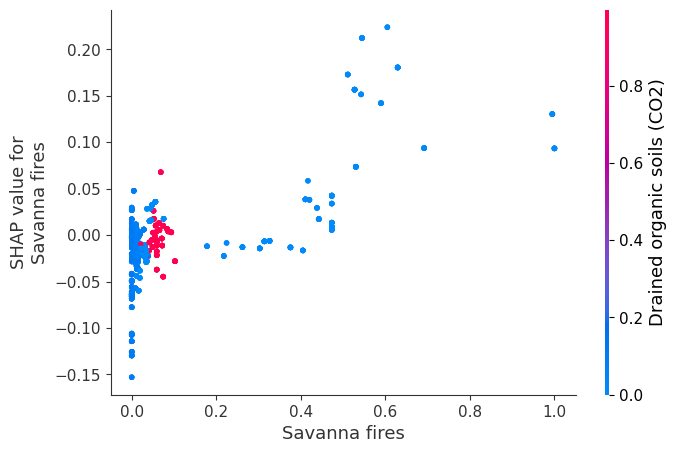

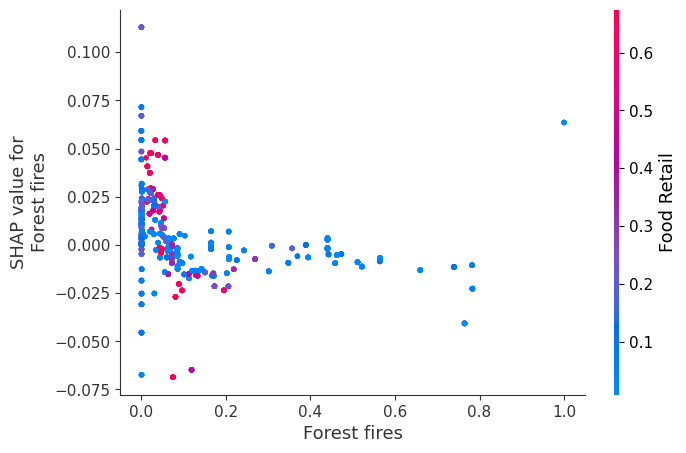

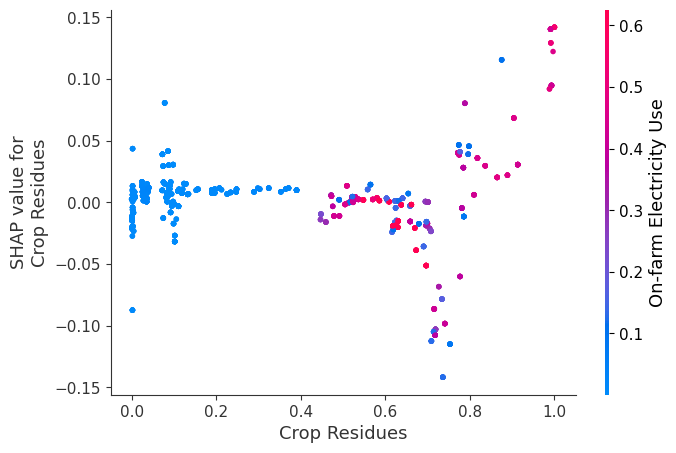

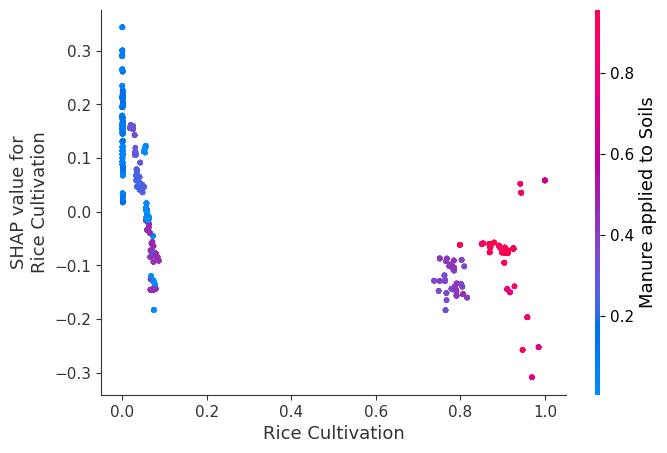

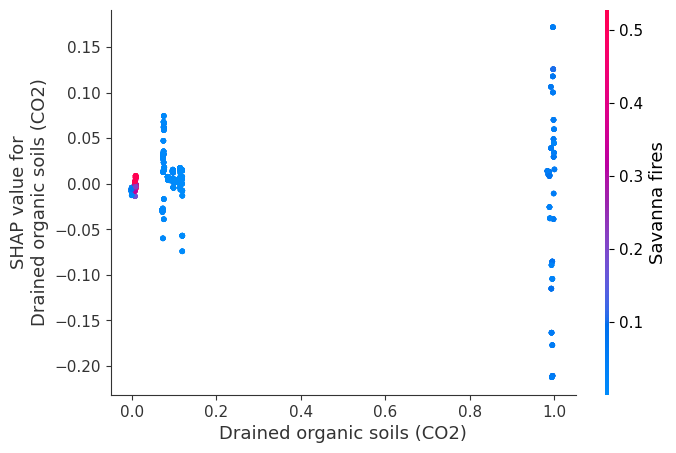

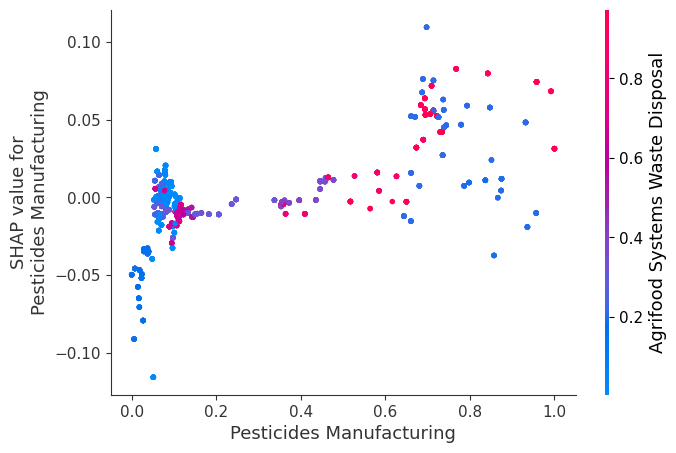

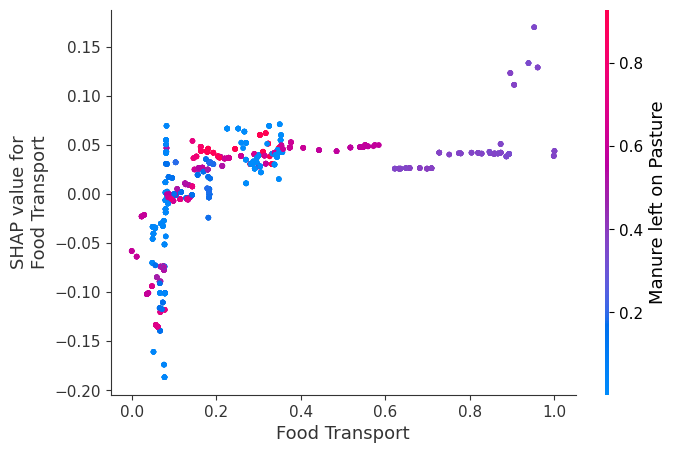

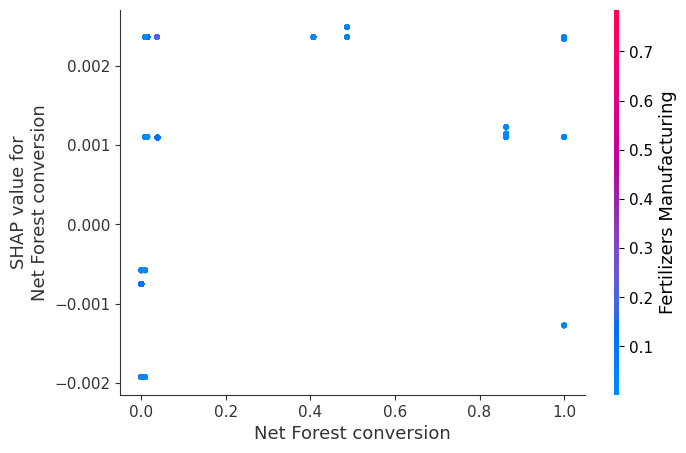

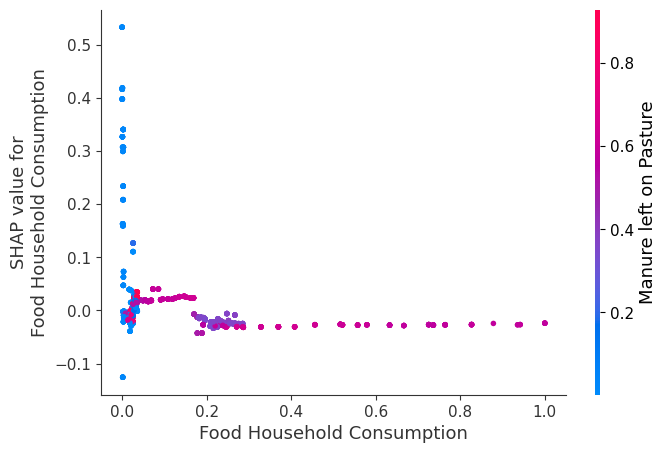

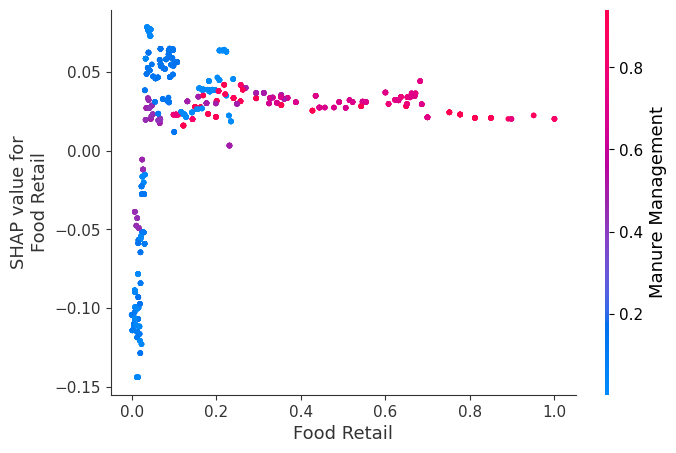

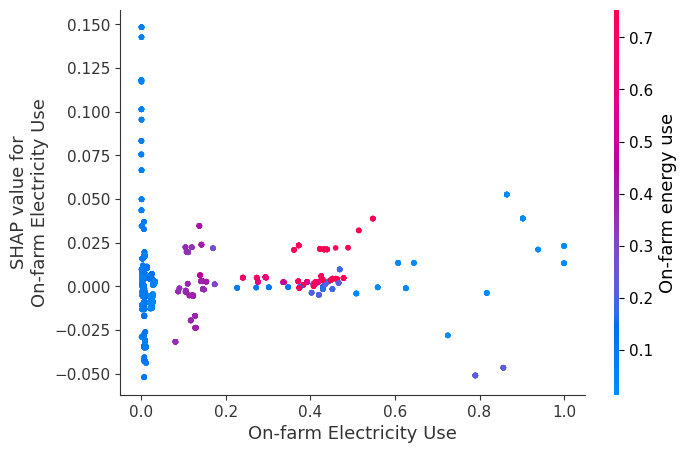

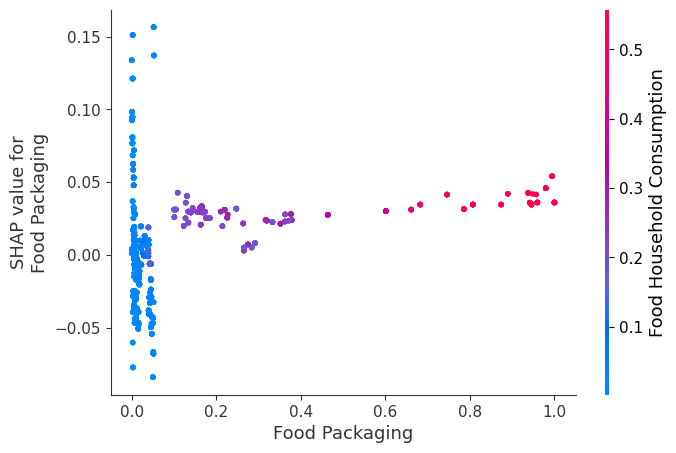

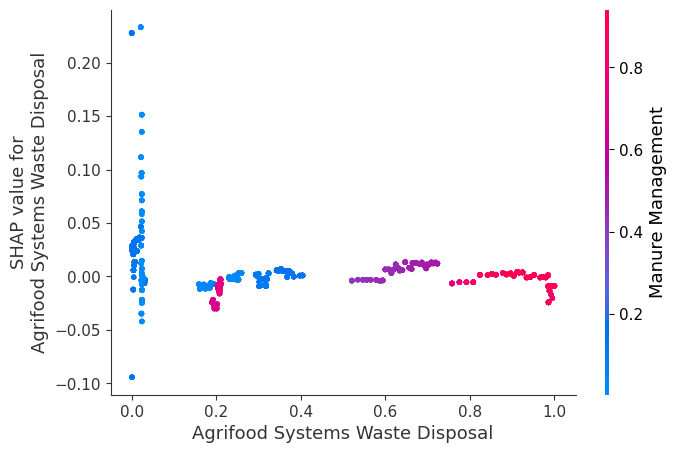

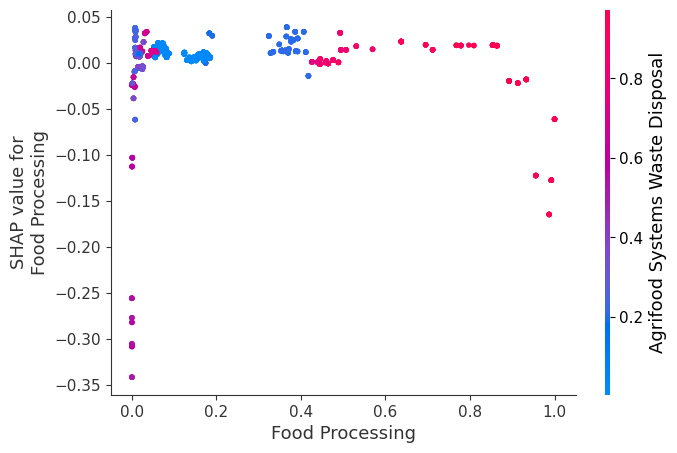

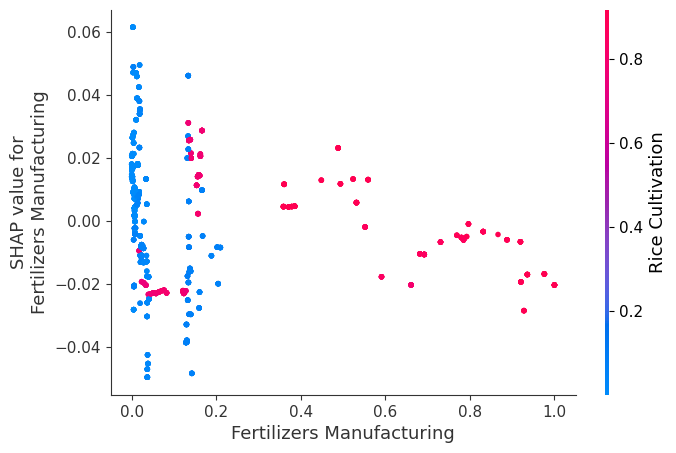

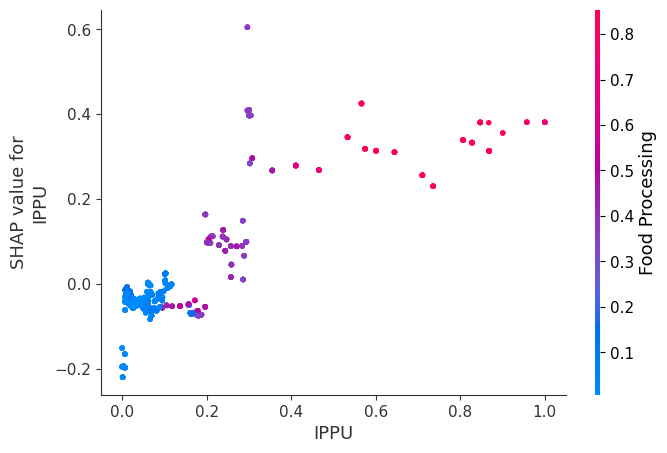

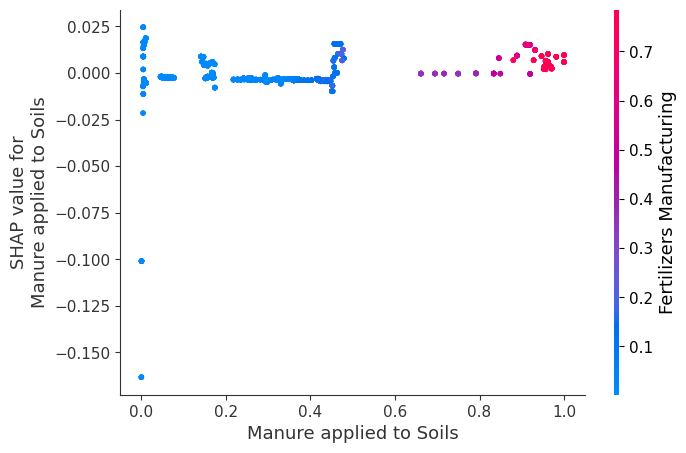

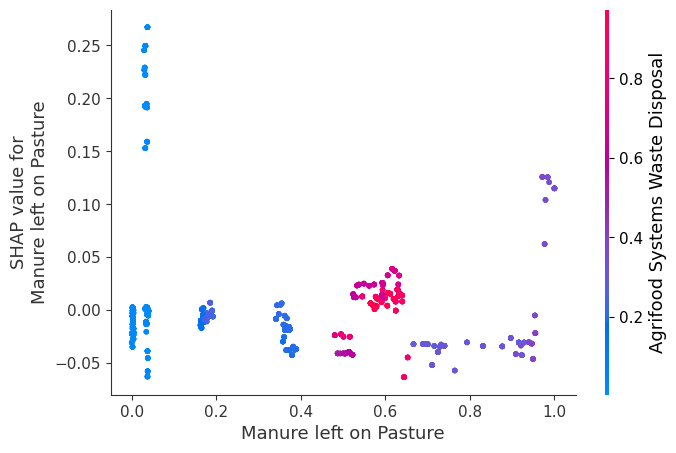

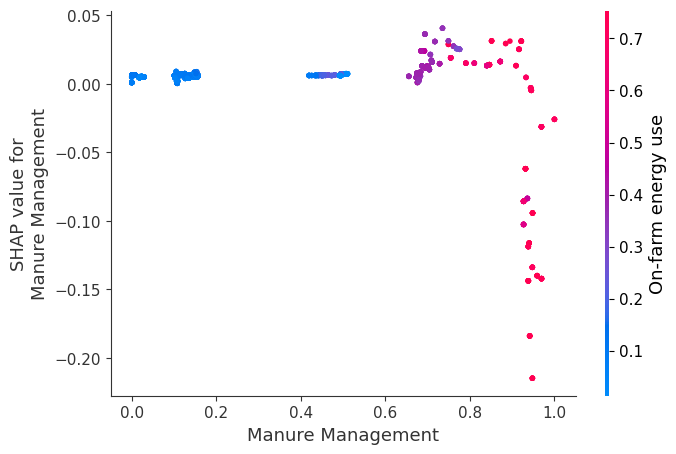

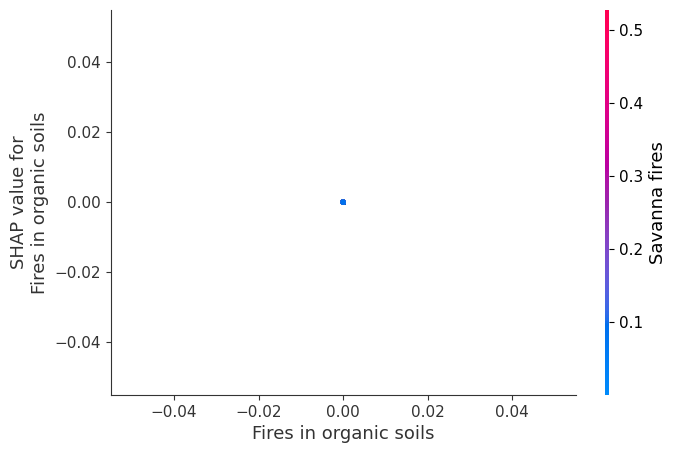

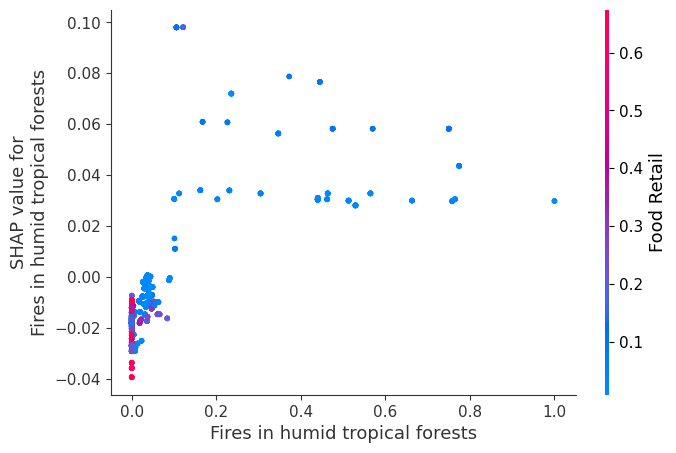

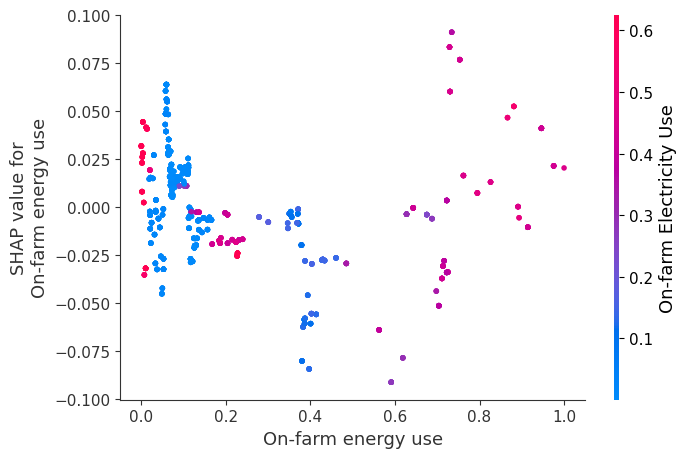

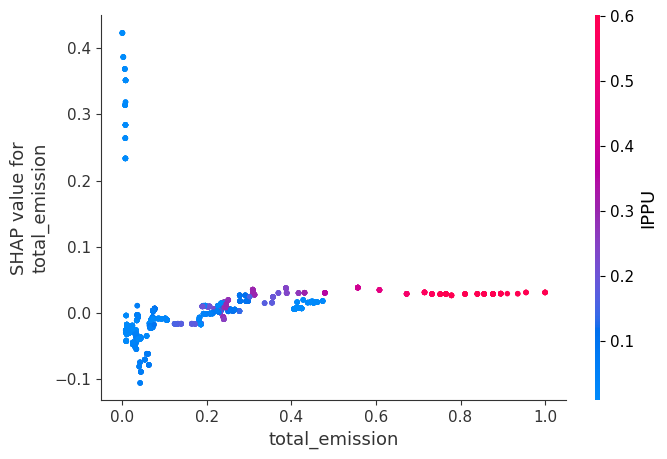

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import shap
import matplotlib.pyplot as plt

# Step 1: Prepare features and target
features = [
    'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation',
    'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport',
    'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
    'On-farm Electricity Use', 'Food Packaging', 'Agrifood Systems Waste Disposal',
    'Food Processing', 'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
    'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
    'Fires in humid tropical forests', 'On-farm energy use', 'total_emission'
]
X = top_countries_data[features]
y = top_countries_data['Average Temperature °C']

# Normalize features
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=features)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Step 3: Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regressor Metrics:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Feature Importance using SHAP
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed SHAP Dependence Plot
for feature in features:
    shap.dependence_plot(feature, shap_values.values, X_test)
